<a href="https://colab.research.google.com/github/clopezv/Challenger_TelecomX/blob/main/IA_aplicada_a_ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong><font color="7b71ff">IA aplicada a Data Science: Utilizando IA en la construcci√≥n de visualizaciones de datos</font></strong>


---

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/logos/logo_branca_fundo_azul.png" alt="inserir alt">

# **Aula 1 - Conociendo los datos**

 Zoop es una gran minorista que atiende a todas las regiones de M√©xico a trav√©s de su e-commerce. Es conocida por la amplia variedad de productos que ofrece, buscando satisfacer a todo tipo de p√∫blico. Posee una serie de centros de distribuci√≥n (CDs) para la entrega de sus productos, la mayor√≠a de ellos situados en el estado de Mexico.

Para gestionar su alcance, as√≠ como la facturaci√≥n de su sector en tiendas online, consolida los datos en diferentes per√≠odos de tiempo y eval√∫a estos datos para generar insights y tomar decisiones estrat√©gicas en su negocio. En este proyecto, tendremos acceso a los datos de parte de su clientela de e-commerce durante el a√±o 2023.

T√∫, como analista de datos de la empresa, necesitar√°s generar visualizaciones que ayuden en la elaboraci√≥n de informes de acuerdo con algunas premisas proporcionadas por las partes interesadas, realizando un r√°pido an√°lisis de la clientela que tenemos en la tienda virtual y de la facturaci√≥n de la empresa.

**Problema de negocio:**

El equipo de datos de Zoop necesita extraer los datos y generar informaci√≥n a trav√©s de visuales que puedan presentarse a la directiva de la empresa, destacando los datos de facturaci√≥n, perfil del cliente y otros indicadores que puedan ayudar en la toma de decisiones en su tienda online.

**Base de datos**

Vamos a importar dos bases de datos:

Datos de los clientes del e-commerce de Zoop, separados por el c√≥digo identificador de la compra.

Datos de ventas del e-commerce de Zoop en 2023, separados por el c√≥digo identificador de la compra.

Estos datos se leer√°n desde el repositorio compartido en GitHub.

**Desaf√≠o**

T√∫, como analista de datos del equipo de datos de Zoop, tienes el desaf√≠o de extraer los datos de ambas bases y construir visualizaciones que puedan agregar valor a la presentaci√≥n de los resultados de Zoop en 2023. Para ello, se te presentar√°n 7 preguntas para que puedas contribuir en la construcci√≥n del storytelling de las ventas de la empresa.

Para agilizar el proceso de an√°lisis exploratorio de datos (AED) y la creaci√≥n de visuales, utilizaremos la IA de ChatGPT como nuestra asistente, teniendo en cuenta el corto plazo para los an√°lisis y la calidad de la entrega.

## **1.2 - Obteniendo los datos**

---



Vamos inicialmente a proveer el link del repositorio con las dos bases que utilizaremos en el proyecto:

In [209]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

Despu√©s de esta etapa, vamos a crear 2 dataframes con los datos de los clientes y de las ventas de Zoop separadamente y realizar una peque√±a verificaci√≥n en las tablas extra√≠das.

In [210]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [211]:
clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)

In [212]:
clientes.head()

ID_compra  ID_cliente            ciudad            estado    region  edad  \
0        904        8972  Oaxaca de Ju√°rez            Oaxaca       Sur    49   
1       4613        5120  Ciudad de M√©xico  Ciudad de M√©xico    Centro    49   
2       5579        1847  Ciudad de M√©xico  Ciudad de M√©xico    Centro    24   
3       2405        2846  Ciudad de M√©xico  Ciudad de M√©xico    Centro    38   
4       2485        2715         Chihuahua         Chihuahua  Noroeste    30   

  sexo_biologico cashback  nota  
0      Masculino       No     9  
1       Femenino       No     9  
2       Femenino       No     8  
3       Femenino       S√≠     7  
4       Femenino       No    10

In [213]:
ventas.tail()

ID_compra       fecha horario            categoria  precio_unitario  \
6164       6141  2023-12-31   17:49    Electrodom√©sticos           1509.9   
6165       6148  2023-12-31   23:02  Papeler√≠a y oficina             14.0   
6166       6123  2023-12-31   21:25  Alimentos y bebidas             77.9   
6167       6147  2023-12-31   21:38               Libros            142.9   
6168       6122  2023-12-31   22:11    Belleza e higiene             89.9   

      cantidad   envio         metodo_pago  
6164         5  377.48  Tarjeta de Cr√©dito  
6165         2    3.36       Transferencia  
6166         1    7.79  Tarjeta de Cr√©dito  
6167         4   17.15  Tarjeta de Cr√©dito  
6168         5   13.48  Tarjeta de Cr√©dito

## **1.3 - Entendiendo los datos**

---


Ahora, vamos a explorar los datos comprendiendo lo que significan y c√≥mo podemos relacionarlos en la construcci√≥n de las visualizaciones.

### **Base de clientes**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos a actuar como analistas de datos de una e-commerce. Recibimos dos bases de datos con los datos de los clientes y de las ventas en 2023, respectivamente.

En este primer momento, vamos a explorar la base de clientes en formato de un DataFrame de pandas, llamado "clientes". Contiene datos de los clientes que realizaron compras en la tienda virtual, siendo estos: ID de la compra, ID del cliente, la ciudad, estado y regi√≥n de la compra, edad, sexo biol√≥gico, si participan en el programa de cashback y la calificaci√≥n, o nota, de la compra.

Queremos hacer una breve exploraci√≥n de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base ya est√°n limpios y tratados. Construye el c√≥digo para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

No es necesario utilizar "print()" para mostrar el resultado de las consultas.

# Ver las primeras filas del DataFrame
clientes.head()

# Dimensiones del DataFrame
clientes.shape

# Tipos de datos y no nulos
clientes.info()

# Estad√≠sticas descriptivas para columnas num√©ricas
clientes.describe()

# Estad√≠sticas descriptivas para columnas categ√≥ricas
clientes.describe(include='object')

# Verificar valores √∫nicos por columna categ√≥rica
clientes['sexo_biologico'].value_counts()
clientes['cidade'].nunique()
clientes['estado'].value_counts()
clientes['regiao'].value_counts()
clientes['participa_cashback'].value_counts()

# Distribuci√≥n de las calificaciones (notas de la compra)
clientes['nota_compra'].value_counts().sort_index()

# Distribuci√≥n de edades
clientes['idade'].describe()
clientes['idade'].hist(bins=20)

# Verificar la cantidad de clientes √∫nicos
clientes['id_cliente'].nunique()

# Verificar la cantidad de compras √∫nicas
clientes['id_compra'].nunique()


In [214]:
# Visualizar las primeras filas del DataFrame para tener una idea general de la estructura de los datos
clientes.head()

ID_compra  ID_cliente            ciudad            estado    region  edad  \
0        904        8972  Oaxaca de Ju√°rez            Oaxaca       Sur    49   
1       4613        5120  Ciudad de M√©xico  Ciudad de M√©xico    Centro    49   
2       5579        1847  Ciudad de M√©xico  Ciudad de M√©xico    Centro    24   
3       2405        2846  Ciudad de M√©xico  Ciudad de M√©xico    Centro    38   
4       2485        2715         Chihuahua         Chihuahua  Noroeste    30   

  sexo_biologico cashback  nota  
0      Masculino       No     9  
1       Femenino       No     9  
2       Femenino       No     8  
3       Femenino       S√≠     7  
4       Femenino       No    10

In [215]:
# Verificar la cantidad de filas y columnas (dimensiones del DataFrame)
clientes.shape

(6169, 9)

In [216]:
# Informaci√≥n general del DataFrame: tipos de datos, columnas, y cantidad de valores no nulos
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_compra       6169 non-null   int64 
 1   ID_cliente      6169 non-null   int64 
 2   ciudad          6169 non-null   object
 3   estado          6169 non-null   object
 4   region          6169 non-null   object
 5   edad            6169 non-null   int64 
 6   sexo_biologico  6169 non-null   object
 7   cashback        6169 non-null   object
 8   nota            6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [217]:
# Estad√≠sticas b√°sicas (media, desviaci√≥n, m√≠nimo, percentiles, etc.) para columnas num√©ricas
clientes.describe()

ID_compra   ID_cliente         edad         nota
count  6169.000000  6169.000000  6169.000000  6169.000000
mean   3085.000000  5461.475280    38.260010     8.443670
std    1780.981237  2610.959977     9.838951     1.730584
min       1.000000  1005.000000    18.000000     0.000000
25%    1543.000000  3148.000000    31.000000     8.000000
50%    3085.000000  5436.000000    38.000000     9.000000
75%    4627.000000  7748.000000    45.000000     9.000000
max    6169.000000  9999.000000    70.000000    10.000000

In [218]:
# Estad√≠sticas descriptivas para columnas categ√≥ricas (como ciudad, sexo biol√≥gico, etc.)
clientes.describe(include='object')

ciudad            estado  region sexo_biologico cashback
count               6169              6169    6169           6169     6169
unique                94                28       9              2        2
top     Ciudad de M√©xico  Estado de M√©xico  Centro       Femenino       No
freq                 458              1042    1540           3371     3557

In [219]:
# Contar la cantidad de valores √∫nicos por sexo biol√≥gico
clientes['sexo_biologico'].value_counts()

sexo_biologico
Femenino     3371
Masculino    2798
Name: count, dtype: int64

In [220]:
# Ver cu√°ntas ciudades distintas hay en la base
clientes['ciudad'].nunique()

94

In [221]:
# Contar la cantidad de registros por estado
clientes['estado'].value_counts()

estado
Estado de M√©xico    1042
Nuevo Le√≥n           570
Jalisco              478
Ciudad de M√©xico     458
Chihuahua            453
Veracruz             411
Puebla               383
Sonora               329
Guanajuato           284
Coahuila             279
Durango              263
Oaxaca               244
Baja California      120
Quer√©taro            118
Sinaloa              111
Yucat√°n              107
Quintana Roo          83
Tamaulipas            58
San Luis Potos√≠       54
Tabasco               51
Zacatecas             45
Nayarit               43
Chiapas               40
Campeche              38
Michoac√°n             35
Aguascalientes        32
Morelos               30
Hidalgo               10
Name: count, dtype: int64

In [222]:
# Contar la cantidad de registros por regi√≥n
clientes['region'].value_counts()

region
Centro          1540
Noroeste        1276
Noreste          907
Occidente        556
Centro-Norte     533
Golfo            411
Centro-Sur       383
Sur              284
Sureste          279
Name: count, dtype: int64

In [223]:
# Ver la cantidad de clientes que participan o no en el programa de cashback
clientes['cashback'].value_counts()

cashback
No    3557
S√≠    2612
Name: count, dtype: int64

In [224]:
# Distribuci√≥n de las notas/calificaciones dadas por los clientes
clientes['nota'].value_counts().sort_index()

nota
0       32
1       33
2       58
3       60
4      113
5       90
6      135
7      689
8      923
9     2519
10    1517
Name: count, dtype: int64

In [225]:
# Estad√≠sticas sobre la edad de los clientes
clientes['edad'].describe()

count    6169.000000
mean       38.260010
std         9.838951
min        18.000000
25%        31.000000
50%        38.000000
75%        45.000000
max        70.000000
Name: edad, dtype: float64

<Axes: >

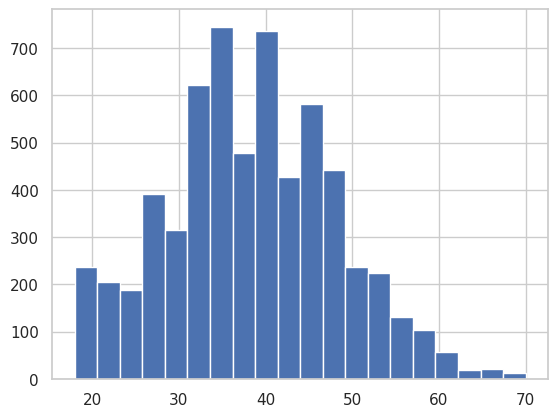

In [226]:
# Histograma de la distribuci√≥n de edades (requiere entorno gr√°fico)
clientes['edad'].hist(bins=20)

In [227]:
# Cantidad de clientes √∫nicos
clientes['ID_cliente'].nunique()

4453

In [228]:
# Cantidad de compras √∫nicas
clientes['ID_compra'].nunique()

6169

### **Base de ventas**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos explorar la base de ventas en formato de un DataFrame, llamado "ventas". Contiene datos de las ventas del comercio electr√≥nico, que son: ID de la compra, fecha de la compra, hora de la compra, categor√≠a del producto, precio unitario del producto, cantidad vendida, env√≠o y el m√©todo de pago.

Queremos hacer una breve exploraci√≥n de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base tambi√©n est√°n limpios y tratados. Construye el c√≥digo para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

In [229]:
#1. Visualizar las primeras 5 filas del DataFrame

clientes.head()

ID_compra  ID_cliente            ciudad            estado    region  edad  \
0        904        8972  Oaxaca de Ju√°rez            Oaxaca       Sur    49   
1       4613        5120  Ciudad de M√©xico  Ciudad de M√©xico    Centro    49   
2       5579        1847  Ciudad de M√©xico  Ciudad de M√©xico    Centro    24   
3       2405        2846  Ciudad de M√©xico  Ciudad de M√©xico    Centro    38   
4       2485        2715         Chihuahua         Chihuahua  Noroeste    30   

  sexo_biologico cashback  nota  
0      Masculino       No     9  
1       Femenino       No     9  
2       Femenino       No     8  
3       Femenino       S√≠     7  
4       Femenino       No    10

In [230]:
ventas['fecha'] = pd.to_datetime(ventas['fecha'], format='%Y-%m-%d')

In [231]:
# 2. Ver las dimensiones del DataFrame (filas, columnas)
ventas.shape  # (n√∫mero de registros, n√∫mero de columnas)


(6169, 8)

In [232]:
# 3. Informaci√≥n general sobre tipos de datos y valores no nulos
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_compra        6169 non-null   int64         
 1   fecha            6169 non-null   datetime64[ns]
 2   horario          6169 non-null   object        
 3   categoria        6169 non-null   object        
 4   precio_unitario  6169 non-null   float64       
 5   cantidad         6169 non-null   int64         
 6   envio            6169 non-null   float64       
 7   metodo_pago      6169 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 385.7+ KB


In [233]:
# 4. Estad√≠sticas descriptivas para columnas num√©ricas (edad, nota de compra, etc.)
ventas.describe()


ID_compra                          fecha  precio_unitario  \
count  6169.000000                           6169      6169.000000   
mean   3085.000000  2023-08-20 00:12:22.292105984       873.234738   
min       1.000000            2023-01-03 00:00:00         2.900000   
25%    1543.000000            2023-05-30 00:00:00        44.900000   
50%    3085.000000            2023-08-31 00:00:00        93.900000   
75%    4627.000000            2023-11-23 00:00:00       221.900000   
max    6169.000000            2023-12-31 00:00:00      8000.000000   
std    1780.981237                            NaN      1852.064342   

          cantidad        envio  
count  6169.000000  6169.000000  
mean      3.004863   119.233832  
min       1.000000     0.000000  
25%       2.000000     0.320000  
50%       3.000000     7.550000  
75%       4.000000    29.240000  
max       5.000000  4521.540000  
std       1.420725   366.149225

In [234]:
# 5. Estad√≠sticas descriptivas para columnas categ√≥ricas (como sexo, ciudad, estado, regi√≥n)
clientes.describe(include='object')

ciudad            estado  region sexo_biologico cashback
count               6169              6169    6169           6169     6169
unique                94                28       9              2        2
top     Ciudad de M√©xico  Estado de M√©xico  Centro       Femenino       No
freq                 458              1042    1540           3371     3557

In [235]:
# 6. Distribuci√≥n del sexo biol√≥gico de los clientes
clientes['sexo_biologico'].value_counts()

sexo_biologico
Femenino     3371
Masculino    2798
Name: count, dtype: int64

In [236]:
# 7. Ver cu√°ntas ciudades distintas hay en los registros
clientes['ciudad'].nunique()

94

In [237]:
# 8. Cantidad de registros por estado
clientes['estado'].value_counts()

estado
Estado de M√©xico    1042
Nuevo Le√≥n           570
Jalisco              478
Ciudad de M√©xico     458
Chihuahua            453
Veracruz             411
Puebla               383
Sonora               329
Guanajuato           284
Coahuila             279
Durango              263
Oaxaca               244
Baja California      120
Quer√©taro            118
Sinaloa              111
Yucat√°n              107
Quintana Roo          83
Tamaulipas            58
San Luis Potos√≠       54
Tabasco               51
Zacatecas             45
Nayarit               43
Chiapas               40
Campeche              38
Michoac√°n             35
Aguascalientes        32
Morelos               30
Hidalgo               10
Name: count, dtype: int64

In [238]:
# 9. Cantidad de registros por regi√≥n
clientes['region'].value_counts()


region
Centro          1540
Noroeste        1276
Noreste          907
Occidente        556
Centro-Norte     533
Golfo            411
Centro-Sur       383
Sur              284
Sureste          279
Name: count, dtype: int64

In [239]:
# 10. Distribuci√≥n de clientes que participan en el programa de cashback
clientes['cashback'].value_counts()

cashback
No    3557
S√≠    2612
Name: count, dtype: int64

In [240]:
# 11. Distribuci√≥n de calificaciones dadas a las compras
clientes['ID_compra'].value_counts().sort_index()

ID_compra
1       1
2       1
3       1
4       1
5       1
       ..
6165    1
6166    1
6167    1
6168    1
6169    1
Name: count, Length: 6169, dtype: int64

In [241]:
# 13. N√∫mero de clientes √∫nicos
clientes['ID_cliente'].nunique()


4453

In [242]:
# 14. N√∫mero de compras √∫nicas
clientes['ID_compra'].nunique()

6169

## **1.4 - Tipos de gr√°ficos**

---


Ya hemos explorado un poco de las dos bases del proyecto y obtuvimos algunos insights interesantes que pueden ser importantes en la construcci√≥n de nuestras visualizaciones.

Ahora, intentemos simplificar nuestro an√°lisis consolidando los datos en una √∫nica tabla para, a partir de ah√≠, enfocarnos en las posibilidades de visuales combinando los datos. ¬øPodr√° GPT ayudarnos aqu√≠?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos a unir las dos bases de nuestro proyecto en una sola utilizando como llave la columna "ID_compra". Adem√°s, organizaremos las columnas en la siguiente secuencia:

* ID_compra
* fecha
* horario
* categoria
* precio_unitario
* cantidad
* envio
* metodo_pago
* ID_cliente
* edad
* sexo_biologico
* ciudad
* estado
* region
* cashback
* nota

Construye un c√≥digo para ejecutar esta etapa usando Python y la biblioteca Pandas.


In [243]:
# Unir los DataFrames "clientes" y "ventas" usando la columna "ID_compra" como llave
df_final = pd.merge(ventas, clientes, on='ID_compra', how='inner')

# Reorganizar las columnas en el orden deseado
columnas_ordenadas = [
    'ID_compra',
    'fecha',
    'horario',
    'categoria',
    'precio_unitario',
    'cantidad',
    'envio',
    'metodo_pago',
    'ID_cliente',
    'edad',
    'sexo_biologico',
    'ciudad',
    'estado',
    'region',
    'cashback',
    'nota'
]

# Renombrar columnas para que coincidan con los nombres indicados (si es necesario)
#df_final = df_final.rename(columns={
##    'cidade': 'ciudad',
#    'regiao': 'region',
#    'participa_cashback': 'cashback',
#    'nota_compra': 'nota'
#})

# Aplicar el nuevo orden de columnas
#df_final = df_final[columnas_ordenadas]

# Verificar las primeras filas del nuevo DataFrame final
df_final.head()


ID_compra      fecha horario                    categoria  precio_unitario  \
0          6 2023-01-03   20:40                 Electr√≥nicos           4457.9   
1          5 2023-01-03   21:48  Herramientas y construcci√≥n            115.9   
2          9 2023-01-03   17:08            Belleza e higiene             68.9   
3          4 2023-01-03   14:29  Herramientas y construcci√≥n             80.9   
4          8 2023-01-03   18:02            Belleza e higiene            165.0   

   cantidad   envio         metodo_pago  ID_cliente            ciudad  \
0         4  713.26              Paypal        6149        Hermosillo   
1         1    0.00       Transferencia        9491  Ciudad de M√©xico   
2         2   13.78  Tarjeta de Cr√©dito        5288    Aguascalientes   
3         5   40.45       Transferencia        9679          Veracruz   
4         4    0.00       Transferencia        1380  Ciudad de M√©xico   

             estado        region  edad sexo_biologico cashback  nota  
0            Sonora      Noroeste    30      Masculino       S√≠    10  
1  Ciudad de M√©xico        Centro    36      Masculino       S√≠     8  
2    Aguascalientes  Centro-Norte    39       Femenino       No     7  
3          Veracruz         Golfo    35      Masculino       S√≠     9  
4  Ciudad de M√©xico        Centro    50      Masculino       No     9

Ahora le pediremos a ChatGPT ideas de visuales que podamos contruir con esos datos

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora con nuestro "df" ya construido a partir de las dos bases del proyecto, vamos a iniciar un nuevo proceso. Queremos comenzar la etapa de generaci√≥n de visuales que puedan ayudar en el an√°lisis de la facturaci√≥n a lo largo del a√±o, el perfil del cliente y otros datos que puedan ser relevantes para el an√°lisis y la construcci√≥n de nuestra narrativa.

Las columnas de "df" son:

* ID_compra: n√∫mero √∫nico asignado a la compra realizada, en formato int
* fecha: fecha de la compra, en formato datetime
* horario: hora de la compra, en formato object
* categoria: categor√≠a del producto, en formato object
* precio_unitario: precio de una unidad del producto, en formato float
* cantidad: cantidad vendida del producto, en formato int
* envio: costo de env√≠o a ser pagado en total de la compra, en formato float
* metodo_pago: m√©todo de pago de la compra, en formato object
* ID_cliente: n√∫mero √∫nico asignado al cliente, en formato int
* edad: edad del cliente, en formato int
* sexo_biologico: sexo biol√≥gico del cliente, en formato object
* ciudad: ciudad del cliente, en formato object
* estado: estado del cliente, en formato object
* region: regi√≥n del cliente, en formato object
* cashback: si el cliente participa o no en el programa de cashback de la tienda, en formato object
* nota: evaluaci√≥n del cliente por la compra, en formato int

El objetivo es abstraer y buscar relaciones para construir visualizaciones interesantes para el an√°lisis de los datos de los clientes y ventas de Zoop.

Con base en la informaci√≥n proporcionada, ¬øqu√© tipos de visualizaciones ser√≠an √∫tiles para alcanzar el objetivo de analizar los datos?

###**Sugerencias de ChtaGPT**
1. An√°lisis de facturaci√≥n y desempe√±o de ventas
‚úÖ Objetivo: Entender ingresos, tendencias temporales y comportamiento de compra

    Facturaci√≥n mensual

        Gr√°fico de l√≠neas o barras: suma de (precio_unitario * cantidad + envio) por mes.

        ‚Üí Ayuda a ver estacionalidad, picos de ventas.

    Facturaci√≥n por categor√≠a

        Gr√°fico de barras horizontales: total de ventas por categor√≠a.

        ‚Üí Permite identificar productos m√°s lucrativos.

    Facturaci√≥n por m√©todo de pago

        Gr√°fico de pastel o barras: distribuci√≥n de ingresos seg√∫n el m√©todo de pago.

        ‚Üí Indica preferencias de los clientes al pagar.

    Ticket promedio por mes

        Gr√°fico de l√≠neas: valor promedio por compra mensual.

        ‚Üí Mostrar√° si el gasto por cliente aumenta/disminuye con el tiempo.

üîπ 2. An√°lisis del perfil de clientes
‚úÖ Objetivo: Conocer mejor a los clientes y c√≥mo se comportan

    Distribuci√≥n de edades

        Histograma o KDE plot de la edad.

        ‚Üí Da idea de los grupos etarios predominantes.

    Distribuci√≥n por sexo biol√≥gico

        Gr√°fico de barras: conteo por sexo.

        ‚Üí Puede compararse con ticket promedio por sexo, por ejemplo.

    Participaci√≥n en cashback

        Pie chart o barra: proporci√≥n de clientes que usan cashback.

        ‚Üí Importante para evaluar efectividad del programa.

    Ticket promedio por grupo de edad o sexo

        Gr√°fico de barras: comparar ingresos medios por grupo.

        ‚Üí √ötil para segmentar campa√±as de marketing.

üîπ 3. An√°lisis geogr√°fico
‚úÖ Objetivo: Entender comportamiento regional y oportunidades de expansi√≥n

    Facturaci√≥n por regi√≥n o estado

        Mapa de calor o gr√°fico de barras por estado/regi√≥n.

        ‚Üí Permite descubrir regiones m√°s rentables o desatendidas.

    N√∫mero de compras por ciudad/estado

    Gr√°fico de barras verticales o mapas si se quiere geolocalizar.

    ‚Üí Ayuda a ver concentraci√≥n de clientes.

üîπ 4. Satisfacci√≥n del cliente
‚úÖ Objetivo: Relacionar calidad del servicio con desempe√±o

    Distribuci√≥n de notas

    Histograma o gr√°fico de barras por nota (1 a 5).

    ‚Üí Para ver la satisfacci√≥n general.

    Notas por categor√≠a o regi√≥n

    Boxplot o gr√°fico de barras agrupadas.

    ‚Üí Ayuda a detectar problemas espec√≠ficos en productos o regiones.

    Relaci√≥n entre nota y participaci√≥n en cashback

    Gr√°fico de barras o violinplot comparando notas de quienes usan/no usan cashback.

    ‚Üí Indica si el cashback mejora la experiencia.

üîπ 5. An√°lisis de comportamiento de compra
‚úÖ Objetivo: Descubrir patrones √∫tiles para estrategia comercial

    Cantidad comprada por categor√≠a

    Gr√°fico de barras: cantidad total por tipo de producto.

    ‚Üí Para entender volumen, no solo facturaci√≥n.

    Horario de compras

    Histograma de horarios (puedes convertirlo a datetime).

    ‚Üí Detecta franjas horarias con m√°s actividad.

    N√∫mero de compras por cliente

    Histograma o gr√°fico de dispersi√≥n.

    ‚Üí Detecta clientes frecuentes vs. ocasionales.

üß† ¬øQu√© se puede derivar de estas visuales?

    Oportunidades de crecimiento regional

    Productos estrella o bajo desempe√±o

    Influencia del cashback y notas en la fidelidad del cliente

    Perfil de cliente ideal para campa√±as personalizadas

    Estrategias de precios y promociones basadas en horarios o temporadas

Si quieres, puedo ayudarte a construir estas visualizaciones en c√≥digo paso a paso (usando matplotlib, seaborn o plotly). ¬øCon cu√°l de estas te gustar√≠a empezar?

###**Desafio Manos a la obra**

In [244]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

In [245]:
import pandas as pd

# Unir las tablas usando ID_compra como clave
df = pd.merge(ventas, clientes, on='ID_compra', how='inner')

# Renombrar columnas si es necesario para que coincidan con los nombres deseados
df = df.rename(columns={
    'horario': 'hora',
    'categoria': 'categor√≠a',
    'participa_cashback': 'cashback',
    'nota_compra': 'nota',
    'regiao': 'region',
    'cidade': 'ciudad'
})

# Reordenar las columnas en el orden deseado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "hora",
    "categor√≠a",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "nota"
]

df = df[columnas_ordenadas]

# Mostrar las primeras filas para verificar
df.head()


ID_compra      fecha   hora                    categor√≠a  precio_unitario  \
0          6 2023-01-03  20:40                 Electr√≥nicos           4457.9   
1          5 2023-01-03  21:48  Herramientas y construcci√≥n            115.9   
2          9 2023-01-03  17:08            Belleza e higiene             68.9   
3          4 2023-01-03  14:29  Herramientas y construcci√≥n             80.9   
4          8 2023-01-03  18:02            Belleza e higiene            165.0   

   cantidad   envio         metodo_pago  ID_cliente  edad sexo_biologico  \
0         4  713.26              Paypal        6149    30      Masculino   
1         1    0.00       Transferencia        9491    36      Masculino   
2         2   13.78  Tarjeta de Cr√©dito        5288    39       Femenino   
3         5   40.45       Transferencia        9679    35      Masculino   
4         4    0.00       Transferencia        1380    50      Masculino   

             ciudad            estado        region cashback  nota  
0        Hermosillo            Sonora      Noroeste       S√≠    10  
1  Ciudad de M√©xico  Ciudad de M√©xico        Centro       S√≠     8  
2    Aguascalientes    Aguascalientes  Centro-Norte       No     7  
3          Veracruz          Veracruz         Golfo       S√≠     9  
4  Ciudad de M√©xico  Ciudad de M√©xico        Centro       No     9

In [246]:
import pandas as pd

# 1. Cargar los datasets desde las URLs
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
zoop_pay = pd.read_csv(url_zoop_pay)

# 2. Fusionar ventas y clientes por 'ID_compra'
df = pd.merge(ventas, clientes, on='ID_compra', how='inner')

# 3. Fusionar el resultado con zoop_pay por 'ID_compra'
df = pd.merge(df, zoop_pay, on='ID_cliente', how='inner')

# 4. Renombrar columnas para asegurar consistencia
df = df.rename(columns={
    'horario': 'hora',
    'categoria': 'categor√≠a',
    'participa_cashback': 'cashback',
    'nota_compra': 'nota',
    'cidade': 'ciudad',
    'regiao': 'region'
})

# 5. Reorganizar las columnas en el orden deseado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "hora",
    "categor√≠a",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "nota"
]

df = df[columnas_ordenadas]

# 6. Mostrar las primeras filas para ver el resultado
df.head()


ID_compra       fecha   hora                    categor√≠a  precio_unitario  \
0          6  2023-01-03  20:40                 Electr√≥nicos           4457.9   
1          5  2023-01-03  21:48  Herramientas y construcci√≥n            115.9   
2          9  2023-01-03  17:08            Belleza e higiene             68.9   
3          4  2023-01-03  14:29  Herramientas y construcci√≥n             80.9   
4          8  2023-01-03  18:02            Belleza e higiene            165.0   

   cantidad   envio         metodo_pago  ID_cliente  edad sexo_biologico  \
0         4  713.26              Paypal        6149    30      Masculino   
1         1    0.00       Transferencia        9491    36      Masculino   
2         2   13.78  Tarjeta de Cr√©dito        5288    39       Femenino   
3         5   40.45       Transferencia        9679    35      Masculino   
4         4    0.00       Transferencia        1380    50      Masculino   

             ciudad            estado        region cashback  nota  
0        Hermosillo            Sonora      Noroeste       S√≠    10  
1  Ciudad de M√©xico  Ciudad de M√©xico        Centro       S√≠     8  
2    Aguascalientes    Aguascalientes  Centro-Norte       No     7  
3          Veracruz          Veracruz         Golfo       S√≠     9  
4  Ciudad de M√©xico  Ciudad de M√©xico        Centro       No     9

# **Clase 2 - Visualizando los dados**

ChatGPT trajo algunas ideas interesantes para la creaci√≥n de los gr√°ficos.

Sin embargo, como ya tenemos algunas preguntas para guiarnos en la creaci√≥n de los visuales, no vamos a seguir todas las sugerencias aqu√≠ mencionadas.

Queda como una sugerencia para ayudarte cuando est√©s trabajando con otras bases y tengas dificultades para pensar en qu√© visualizaciones podr√≠as construir.

**Observaci√≥n:** Recordando que es muy probable que los gr√°ficos que se me se√±alaron, no sean necesariamente los mismos que aparecer√°n para ti, dado a la aleatoriedad de las respuestas de cualquier IA generativa.

## **2.1 - Definiendo los visualizaciones**

---

Despu√©s de la etapa de exploraci√≥n de los datos, vamos a leer las preguntas que se plantearon en la demanda que recibimos. As√≠, comenzaremos a pensar en los visuales que vamos a construir con la ayuda de la IA.

### **Preguntas**

#### Ventas

1. ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?
2. ¬øCu√°l fue la facturaci√≥n por categor√≠a en 2023?
3. ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?
4. ¬øC√≥mo se divide la venta por trimestre por m√©todo de pago? ¬øExiste un per√≠odo en que alg√∫n tipo de pago se destaca?


#### Perfil del cliente

5. ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?
6. ¬øC√≥mo est√°n distribuidas las evaluaciones del producto? ¬øTenemos buenos n√∫meros generales?
7. ¬øC√≥mo se distribuye nuestro p√∫blico por edad y sexo biol√≥gico? ¬øExiste un grupo que se destaca?

Inicialmente, vamos a hacer la primera versi√≥n de los gr√°ficos, a√∫n no refinados con los elementos visuales, para m√°s adelante ir a√±adiendo las diversas t√©cnicas de storytelling.

### **1ra Pregunta:** ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?

Le vamos pedir a ChatGPT que nos auxilie en la construcci√≥n de este visual. Primero, trataremos los datos generando una tabla resumida (que tambi√©n es una especie de visual) y luego construiremos el primer gr√°fico.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un visual que presente cu√°les m√©todos de pago fueron los m√°s utilizados.

En "df", tenemos la columna "metodo_pago" con los 4 tipos de pago utilizados en la compra.

Inicialmente, queremos construir una tabla llamada "metodos_de_pago" que resuma los datos de esta columna y, a continuaci√≥n, deseamos crear una visualizaci√≥n que muestre la cantidad de esos m√©todos de pago presentes en la tabla "metodo_pago".

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


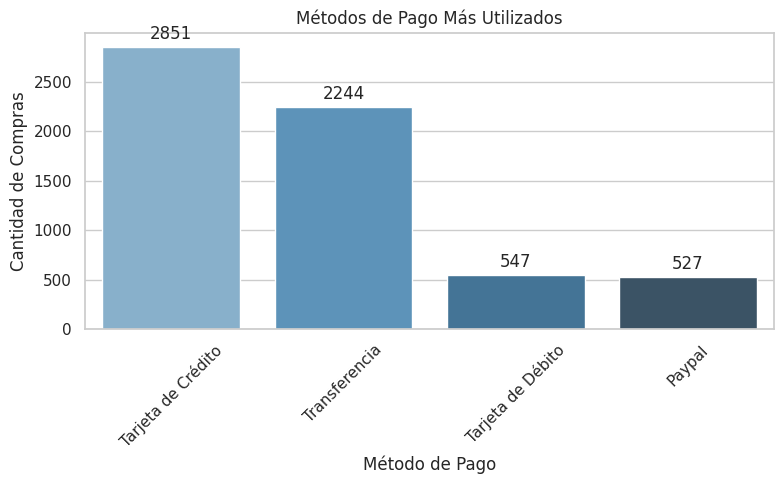

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen de m√©todos de pago
metodos_de_pago = df['metodo_pago'].value_counts().reset_index()
metodos_de_pago.columns = ['metodo_pago', 'cantidad']

# 2. Visualizaci√≥n de los m√©todos de pago
plt.figure(figsize=(8, 5))
#sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', palette='Blues_d')
ax = sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', palette='Blues_d')

# Agregar los valores arriba de cada barra
for i in ax.containers:
  ax.bar_label(i, fmt='%.0f', label_type='edge', padding=3)

plt.title('M√©todos de Pago M√°s Utilizados')
plt.xlabel('M√©todo de Pago')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<font color="7b71ff" size=4> Comentarios: </font>

---

Podemos observar que, incluso sin especificar el tipo de gr√°fico, por la forma en que presentamos los datos a ChatGPT, logr√≥ representar con √©xito un visual que muestra la informaci√≥n deseada. Un gr√°fico de barras es realmente ideal para representar las cantidades de una o m√°s categor√≠as de datos.

Iremos ajustando poco a poco los visuales para que se adecuen a nuestro p√∫blico y reflejen la identidad visual de la empresa.


## **2.2 - Comparando los datos**

---

### **2da Pregunta:** ¬øCu√°l fue la facturaci√≥n por categoria em 2023?

**Observaci√≥n:** Para la facturaci√≥n, consideraremos aqu√≠ el producto entre el precio unitario y la cantidad, sumados al costo de env√≠o de cada producto.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras horizontales que muestre la facturaci√≥n por categor√≠a de Zoop.

En "df", tenemos las siguientes columnas:
* categoria: categor√≠as de los productos
* precio_unitario: precio de una unidad del producto
* cantidad: cantidad vendida del producto
* envio: costo de env√≠o total de la compra.

Deseamos crear una visualizaci√≥n que muestre la facturaci√≥n de cada categor√≠a, donde la facturaci√≥n se calcula multiplicando el precio unitario por la cantidad y sumando el costo de env√≠o.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


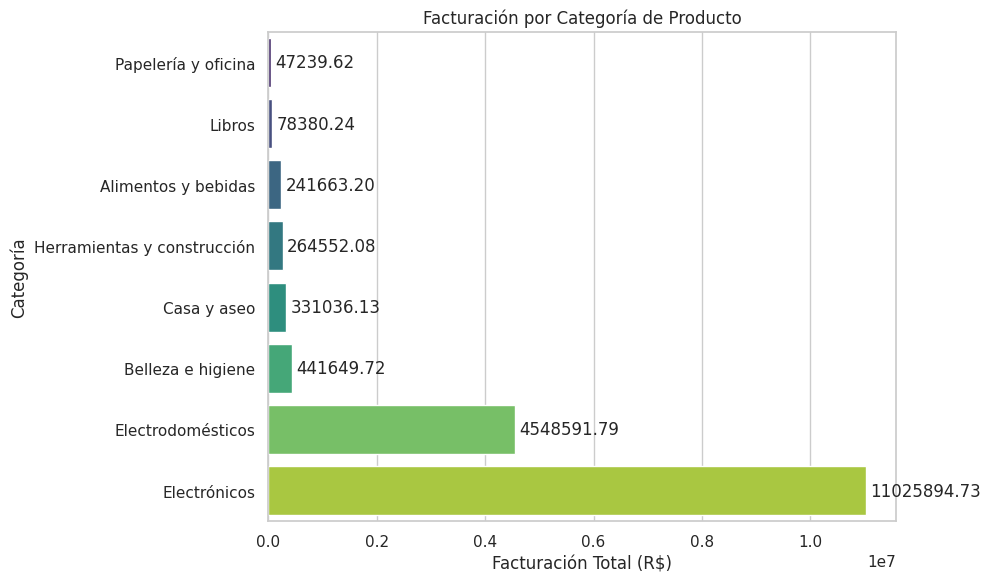

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular la facturaci√≥n por fila
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# 2. Agrupar la facturaci√≥n por categor√≠a
facturacion_categoria = df.groupby('categor√≠a')['facturacion'].sum().reset_index().sort_values(by='facturacion', ascending=True)

# 3. Visualizar con gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=facturacion_categoria, x='facturacion', y='categor√≠a', palette='viridis')

# 4. Agregar los valores al lado de las barras
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge', padding=3)

plt.title('Facturaci√≥n por Categor√≠a de Producto')
plt.xlabel('Facturaci√≥n Total (R$)')
plt.ylabel('Categor√≠a')
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Aqu√≠ especificamos el tipo de gr√°fico, guiando a ChatGPT en la creaci√≥n de nuestro visual. Podemos notar que en un gr√°fico de barras el enfoque est√° m√°s centrado en las categor√≠as, adem√°s de ser una forma m√°s fluida de leer textos que podr√≠an ser demasiado extensos para un gr√°fico de columnas.


### **3a Pregunta:** ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de l√≠neas que muestre las ventas totales mensuales de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturaci√≥n: calculada como el producto del precio unitario y la cantidad, sumado al costo de env√≠o de cada venta.

Deseamos crear una visualizaci√≥n que muestre las ventas por mes. Primero, agrupa los datos por mes y luego crea una nueva columna llamada "mes" que contenga el nombre de cada mes, traduciendo los meses del √≠ndice mediante el siguiente diccionario. Utiliza la columna "fecha" para agrupar los datos y construir el gr√°fico. La columna "mes" solo debe usarse para cambiar las etiquetas del eje x.

```
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}
```


Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


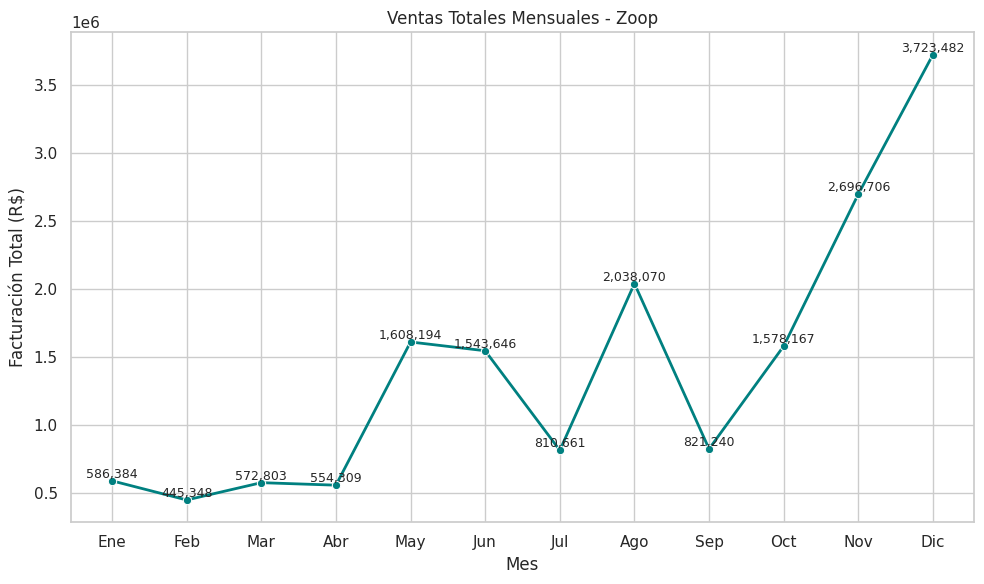

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de traducci√≥n de meses
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# 1. Asegurarse de tener la columna de facturaci√≥n
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# Asegurarse de que la columna 'fecha' est√© en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# 2. Extraer el mes de la fecha
df['mes_num'] = df['fecha'].dt.month
df['mes_nombre'] = df['fecha'].dt.month_name()

# 3. Agrupar por mes (num√©rico para ordenar correctamente) y sumar la facturaci√≥n
ventas_mensuales = df.groupby(['mes_num', 'mes_nombre'])['facturacion'].sum().reset_index()

# 4. Traducir el nombre del mes al espa√±ol
ventas_mensuales['mes'] = ventas_mensuales['mes_nombre'].map(meses)

# 5. Ordenar los meses por n√∫mero
ventas_mensuales = ventas_mensuales.sort_values('mes_num')

# 6. Graficar
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x='mes', y='facturacion', marker='o', linewidth=2, color='teal')
# Agregar etiquetas de valor sobre cada punto
for i in range(len(ventas_mensuales)):
    plt.text(
        x=ventas_mensuales['mes'].iloc[i],
        y=ventas_mensuales['facturacion'].iloc[i] + 100,  # Ajuste para no tapar el punto
        s=f"{ventas_mensuales['facturacion'].iloc[i]:,.0f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Ventas Totales Mensuales - Zoop')
plt.xlabel('Mes')
plt.ylabel('Facturaci√≥n Total (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Cuando tenemos una cantidad mayor de per√≠odos en nuestros datos, vale la pena recurrir a gr√°ficos de l√≠neas, que son ideales para series temporales. Dado que nuestros datos son mensuales, utilizar un gr√°fico de columnas, por ejemplo, reducir√≠a la percepci√≥n de la secuencia de los datos. Las l√≠neas ofrecen una mayor sensaci√≥n de continuidad.

Si√©ntete libre de formular algunas hip√≥tesis sobre los momentos de alta y baja en las compras.


##**2.3 - Componiendo datos din√°micos**


Construimos algunos visuales interesantes para comparar los datos, mostrando las facturaciones de Zoop. Ahora, pasemos a una nueva categor√≠a de visuales: composici√≥n.

Vamos a hacer una composici√≥n din√°mica de los datos. Para ello, a√±adiremos m√°s variables al an√°lisis, incorporando 3 variables diferentes, siendo una de ellas categ√≥rica.

###**4a Pregunta:** ¬øC√≥mo est√° dividida la venta por trimestre por m√©todo de pago? ¬øExiste alg√∫n per√≠odo en el que alg√∫n tipo de pago se destaque?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras apiladas que muestre las ventas por trimestre en relaci√≥n con el m√©todo de pago de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturacion: con los valores de las ventas
* metodo_pago: con el m√©todo de pago elegido en la compra

Deseamos crear una visualizaci√≥n que muestre las ventas por trimestre, agrupando los m√©todos de pago de cada trimestre correspondientes a cada compra.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


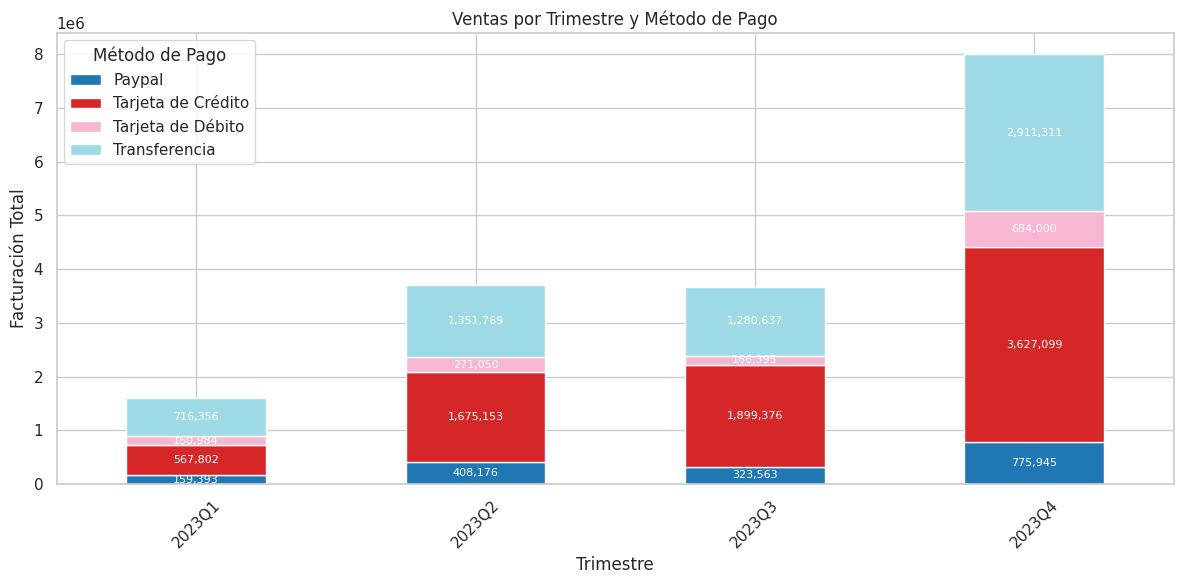

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df ya est√° cargado y tiene las columnas mencionadas
# Aseguramos que la columna 'fecha' sea tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Creamos una columna para el trimestre y el a√±o
df['trimestre'] = df['fecha'].dt.to_period('Q')

# Agrupamos por trimestre y m√©todo de pago, sumando la facturaci√≥n
ventas_trimestre = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack(fill_value=0)

# Creamos el gr√°fico de barras apiladas
ax = ventas_trimestre.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
# A√±adir etiquetas de valores
for idx, row in enumerate(ventas_trimestre.values):
    cum_height = 0
    for col_idx, value in enumerate(row):
        if value > 0:
            ax.text(
                idx,                      # posici√≥n x (barra)
                cum_height + value / 2,   # posici√≥n y (centro del segmento)
                f'{value:,.0f}',          # texto a mostrar
                ha='center', va='center',
                fontsize=8, color='white'
            )
            cum_height += value  # acumular altura para el siguiente segmento


plt.title('Ventas por Trimestre y M√©todo de Pago')
plt.xlabel('Trimestre')
plt.ylabel('Facturaci√≥n Total')
plt.legend(title='M√©todo de Pago')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###**Ejercicio de Curso Implementado por chatGPT**

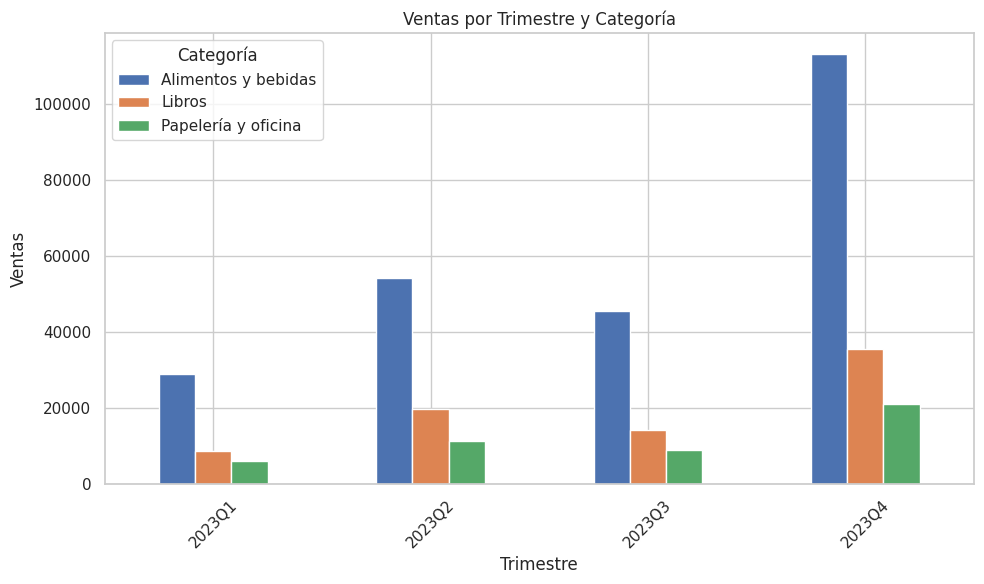

In [251]:
import pandas as pd
import matplotlib.pyplot as plt

df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']
df['trimestre'] = df['fecha'].dt.to_period('Q')
# Suponiendo que ya tienes el DataFrame df
# Filtrar las categor√≠as deseadas
categorias_deseadas = ["Papeler√≠a y oficina", "Libros", "Alimentos y bebidas"]
df_filtrado = df[df['categor√≠a'].isin(categorias_deseadas)]
# Pivotar los datos para tener los trimestres como √≠ndice y las categor√≠as como columnas
pivot_df = df_filtrado.pivot_table(index='trimestre', columns='categor√≠a', values='facturacion', aggfunc='sum')
# Crear el gr√°fico de columnas agrupadas
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))
# Agregar etiquetas y t√≠tulo
plt.xlabel('Trimestre')
plt.ylabel('Ventas')
plt.title('Ventas por Trimestre y Categor√≠a')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
# Mostrar el gr√°fico
plt.legend(title='Categor√≠a')
plt.tight_layout()
plt.show()

###**Desaf√≠o: generando visualizaciones con respecto a la localizaci√≥n**

         region  facturacion
0        Centro   3892973.39
5      Noroeste   3675610.54
4       Noreste   2714735.12
1  Centro-Norte   1402610.45
6     Occidente   1362102.38
2    Centro-Sur   1317884.94
3         Golfo   1112592.94
7           Sur    819569.61
8       Sureste    680928.14


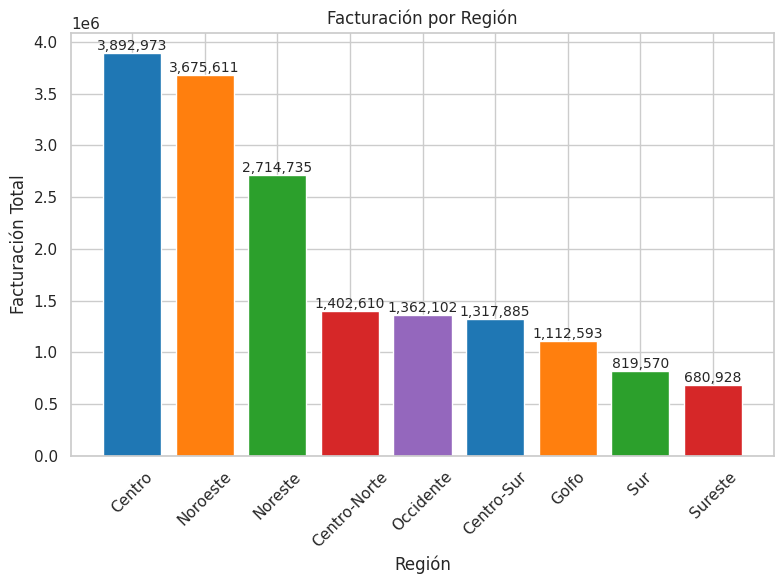

In [252]:
#Desafio 1
# Unir las tablas por ID_compra
df = pd.merge(clientes, ventas, on='ID_compra')

# Calcular la facturaci√≥n
df['facturacion'] = df['precio_unitario'] * df['cantidad'] + df['envio']

# Colores distintos por barra (puedes personalizar m√°s si lo deseas)
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Agrupar por regi√≥n y sumar la facturaci√≥n
facturacion_por_region = df.groupby('region')['facturacion'].sum().reset_index()

# Ordenar de mayor a menor facturaci√≥n
facturacion_por_region = facturacion_por_region.sort_values(by='facturacion', ascending=False)
# Crear gr√°fico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(facturacion_por_region['region'], facturacion_por_region['facturacion'], color=colores[:len(facturacion_por_region)])
# A√±adir los valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, format(height, ',.0f'),
    #plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height:.0f}',
             ha='center', va='bottom', fontsize=10)
print(facturacion_por_region)
# Etiquetas y t√≠tulo
plt.xlabel('Regi√≥n')
plt.ylabel('Facturaci√≥n Total')
plt.title('Facturaci√≥n por Regi√≥n')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()
plt.show()




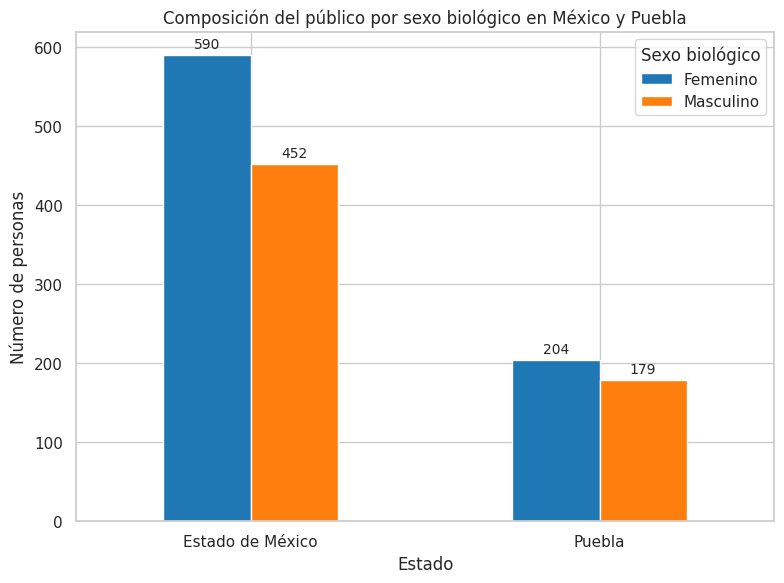

In [253]:
#Desafio 2:
# Filtrar estados M√©xico y Puebla
filtro_estados = df[df['estado'].isin(['Estado de M√©xico', 'Puebla'])]
# Agrupar por estado y sexo biol√≥gico
conteo = filtro_estados.groupby(['estado', 'sexo_biologico']).size().unstack().fillna(0)

# Crear gr√°fico de barras agrupadas
ax = conteo.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))

# Agregar etiquetas de valor sobre las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

# Agregar etiquetas
plt.title('Composici√≥n del p√∫blico por sexo biol√≥gico en M√©xico y Puebla')
plt.xlabel('Estado')
plt.ylabel('N√∫mero de personas')
plt.legend(title='Sexo biol√≥gico', labels=['Femenino', 'Masculino'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

El gr√°fico de columnas apiladas a√±ade a la comparaci√≥n entre per√≠odos o categor√≠as, la comparaci√≥n tambi√©n entre los datos de cada per√≠odo/categor√≠a. Es como si pusi√©ramos una "lupa" en cada columna y visualiz√°ramos la composici√≥n de cada una de acuerdo con la variable deseada (aqu√≠, las formas de pago).

Si√©ntete libre de formular algunas hip√≥tesis sobre las ventas por trimestre combinadas con el tipo de pago y qu√© ideas podemos obtener de esta base de datos.


## **3.1 - Componiendo datos est√°ticos**

---

Inicialmente, presentaremos un ejemplo de c√≥mo podemos utilizar la comparaci√≥n de datos est√°ticos, es decir, un recorte en el tiempo o de las variables que poseemos.

### **5¬™ Pregunta:** ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la proporci√≥n de usuarios(as) que est√°n participando en el programa de cashback de Zoop.

En "df", tenemos la columna "cashback" que contiene estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


Total de Clientes: 6169


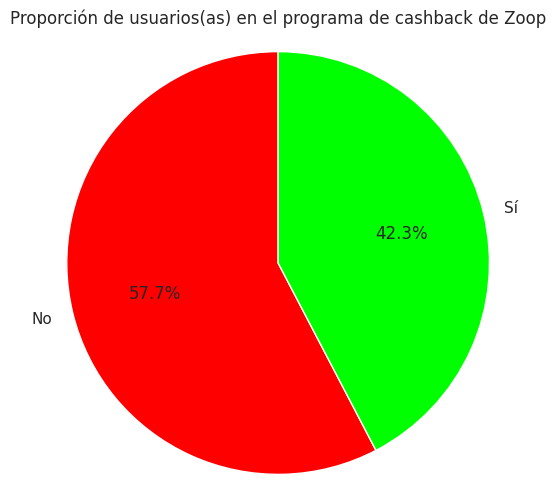

In [254]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la participaci√≥n en cashback
conteo = df['cashback'].value_counts()
print(f'Total de Clientes: {conteo.sum()}')
# Crear gr√°fico de pastel
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90, colors=['#FF0000', '#00FF00'])
plt.title('Proporci√≥n de usuarios(as) en el programa de cashback de Zoop')
plt.axis('equal')  # Mantiene el c√≠rculo bien formado
plt.show()


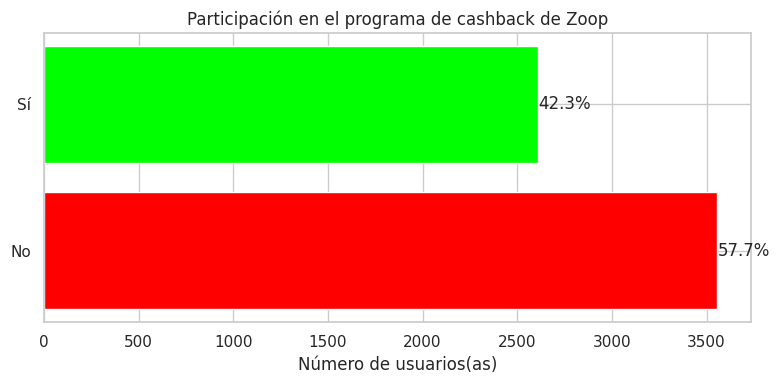

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la participaci√≥n en cashback
conteo = df['cashback'].value_counts()

# Crear gr√°fico de barras
plt.figure(figsize=(8, 4))
bars = plt.barh(conteo.index.astype(str), conteo.values, color=['#FF0000', '#00FF00'])

# Agregar etiquetas con porcentaje
total = conteo.sum()
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{(width / total) * 100:.1f}%', va='center')

# Personalizaci√≥n
plt.xlabel('N√∫mero de usuarios(as)')
plt.title('Participaci√≥n en el programa de cashback de Zoop')
plt.tight_layout()
plt.show()


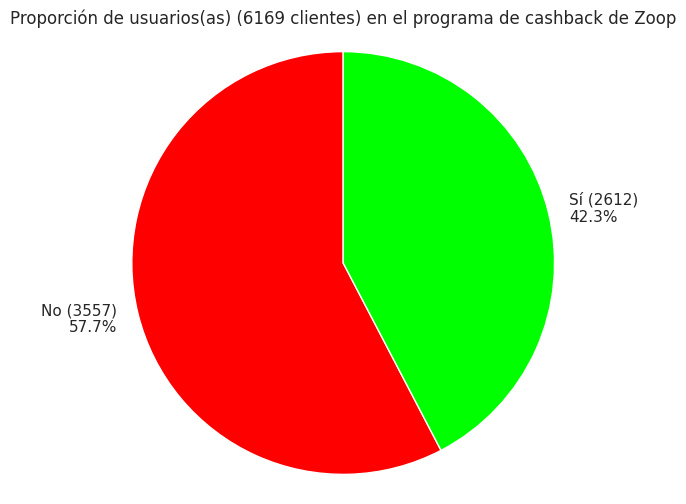

In [256]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes el DataFrame df con una columna 'cashback'
# Ejemplo: df = pd.DataFrame({'cashback': ['S√≠', 'No', 'S√≠', 'S√≠', 'No']})

# Contar valores
conteo = df['cashback'].value_counts()
total = conteo.sum()

# Crear gr√°fico de pastel con etiquetas personalizadas
labels = [f'{label} ({count})\n{count/total:.1%}' for label, count in conteo.items()]

plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=labels, startangle=90, colors=['#FF0000', '#00FF00'])
plt.title(f'Proporci√≥n de usuarios(as) ({total} clientes) en el programa de cashback de Zoop')
plt.axis('equal')
plt.show()


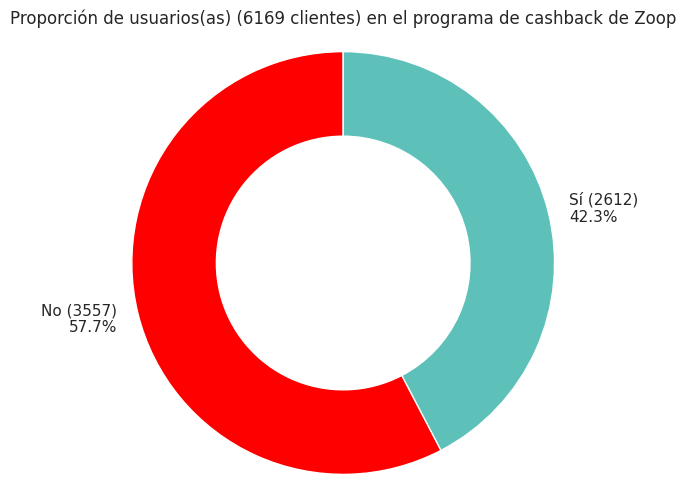

In [257]:
# Contar participaci√≥n
conteo = df['cashback'].value_counts()
total = conteo.sum()

# Crear etiquetas personalizadas: "S√≠ (5)\n55.6%"
labels = [f'{label} ({count})\n{count/total:.1%}' for label, count in conteo.items()]

# Colores personalizados
colors = ['#FF0000', '#5DC1B9']  # Verde para S√≠, Amarillo para No

# Crear gr√°fico de rosquilla (donut)
plt.figure(figsize=(6, 6))
wedges, texts = plt.pie(conteo, labels=labels, startangle=90, colors=colors, wedgeprops={'width': 0.4})

# Agregar t√≠tulo con total
plt.title(f'Proporci√≥n de usuarios(as) ({total} clientes) en el programa de cashback de Zoop')

# Hacerlo perfectamente circular
plt.axis('equal')

# Mostrar el gr√°fico
plt.show()

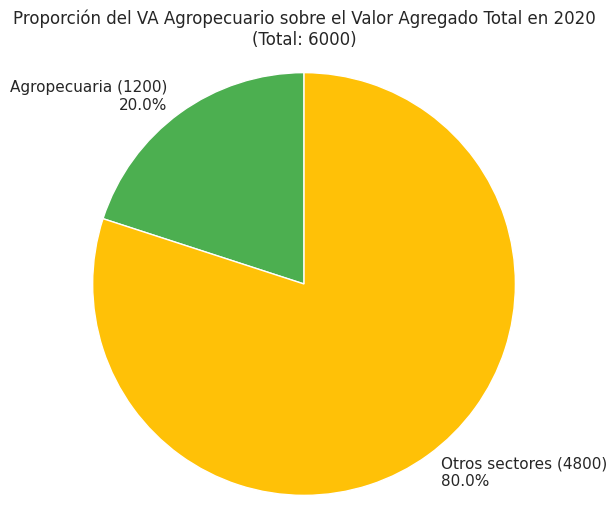

In [258]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que el DataFrame df tiene esta estructura:
# Tipo: 'Agropecuaria' y 'Resto' (o 'Total sin Agropecuaria')
df_data = pd.DataFrame({
    'Tipo': ['Agropecuaria', 'Otros sectores'],
    'Valor': [1200, 4800]  # Ejemplo: en miles de millones
})

# Calcular el total para el t√≠tulo
total_va = df_data['Valor'].sum()

# Crear etiquetas personalizadas con valor y porcentaje
labels = [f"{row['Tipo']} ({row['Valor']})\n{row['Valor'] / total_va:.1%}" for _, row in df_data.iterrows()]

# Crear gr√°fico de pastel (pizza)
plt.figure(figsize=(6, 6))
plt.pie(df_data['Valor'], labels=labels, startangle=90, colors=['#4CAF50', '#FFC107'])
plt.title(f'Proporci√≥n del VA Agropecuario sobre el Valor Agregado Total en 2020\n(Total: {total_va})')
plt.axis('equal')  # Mantener forma circular
plt.show()


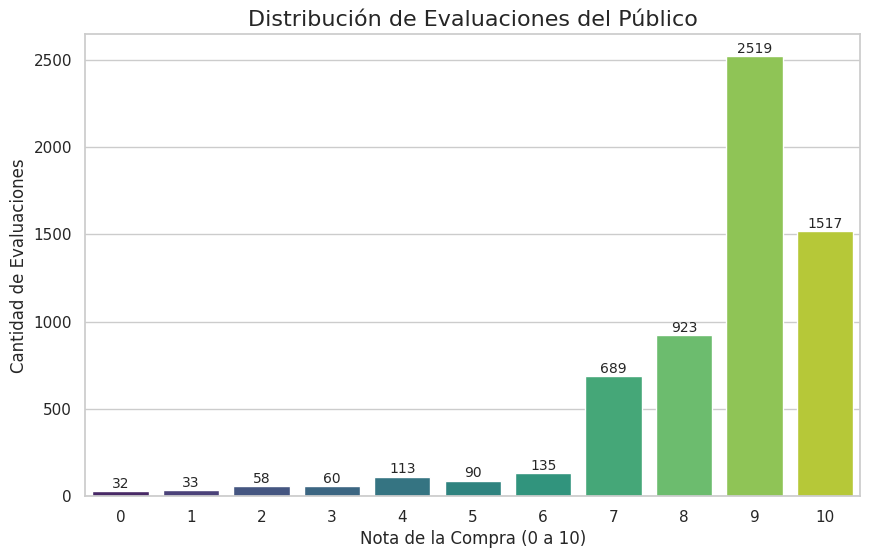

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn para una mejor visualizaci√≥n
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='nota', palette='viridis')

# A√±adir valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Evita mostrar etiquetas en barras vac√≠as
        ax.text(
            p.get_x() + p.get_width() / 2,  # Posici√≥n X centrada
            height + 1,                     # Un poco por encima de la barra
            f'{int(height)}',              # Mostrar valor como entero
            ha='center', va='bottom', fontsize=10
        )

# A√±adir etiquetas y t√≠tulo
plt.title('Distribuci√≥n de Evaluaciones del P√∫blico', fontsize=16)
plt.xlabel('Nota de la Compra (0 a 10)', fontsize=12)
plt.ylabel('Cantidad de Evaluaciones', fontsize=12)
plt.xticks(range(0, 11))  # Asegura que est√©n todos los valores de 0 a 10

# Mostrar el gr√°fico
plt.show()



> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬øPodr√≠as utilizar el color rojo y mantener el azul y cambiar el gr√°fico anterior a uno tipo rosquilla?

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


<font color="7b71ff" size=4> Comentarios: </font>

---

¬°Mira eso! Una vez m√°s, la IA nos present√≥ una buena idea de qu√© gr√°fico aplicar para este caso, pero ¬ønotaste que "ella" no tiene idea de los datos que poseemos?

Debemos estar atentos a esto, ya que solo le proporcionamos los nombres de las columnas y los datos que hab√≠a all√≠. La IA no puede saber si un valor es positivo o negativo, por ejemplo. Por eso, el "no" estaba en azul y el "s√≠" en verde. En el siguiente prompt, le indicamos que sustituyera el color verde por el rojo (sin mencionar el valor real de los datos) y pedimos una modificaci√≥n en el visual.

¬øQu√© tal si experimentas hacer otros pedidos y ves c√≥mo se comporta ChatGPT?

Hablando del gr√°fico, los gr√°ficos de sectores son ideales para pocas categor√≠as de datos, preferiblemente datos dicot√≥micos (2 categor√≠as, como s√≠ y no, gato y perro...). Representan la proporci√≥n de los datos de manera est√°tica.

## **3.2 - Distribuyendo Datos**

---


Con la ayuda de la IA, generaremos m√°s gr√°ficos que ser√°n importantes para la construcci√≥n del storytelling del informe de Zoop, seg√∫n lo solicitado. Ahora, partiendo de la distribuci√≥n de datos, vamos a analizar el perfil de los clientes y c√≥mo eval√∫an sus compras en Zoop.

### **6¬™ Pregunta:** ¬øC√≥mo est√°n distribuidas las calificaciones de la compra? ¬øTenemos buenos n√∫meros en general?  


Vamos a pedirle a ChatGPT que nos ayude a construir este visual. Veamos si esta IA puede representar estos datos con un visual adecuado.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de las evaluaciones del p√∫blico en relaci√≥n con las compras realizadas en la tienda online.

En "df", tenemos la columna "nota" con las calificaciones otorgadas por cada usuario en relaci√≥n con la compra que realizaron, que var√≠an de 0 a 10 en n√∫meros enteros.

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear este gr√°fico.


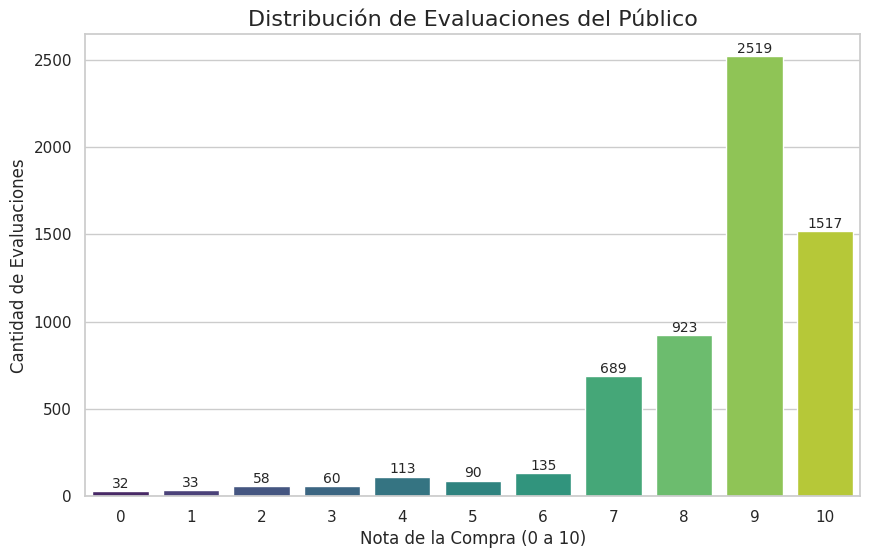

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn para una mejor visualizaci√≥n
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(10, 6))
#sns.countplot(data=df, x='nota', palette='viridis')
ax = sns.countplot(data=df, x='nota', palette='viridis')
# A√±adir valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Evita mostrar etiquetas en barras vac√≠as
        ax.text(
            p.get_x() + p.get_width() / 2,  # Posici√≥n X centrada
            height + 1,                     # Un poco por encima de la barra
            f'{int(height)}',              # Mostrar valor como entero
            ha='center', va='bottom', fontsize=10
        )
# A√±adir etiquetas y t√≠tulo
plt.title('Distribuci√≥n de Evaluaciones del P√∫blico', fontsize=16)
plt.xlabel('Nota de la Compra (0 a 10)', fontsize=12)
plt.ylabel('Cantidad de Evaluaciones', fontsize=12)
plt.xticks(range(0, 11))  # Asegura que est√©n todos los valores de 0 a 10

# Mostrar el gr√°fico
plt.show()


###**Gr√°fico de Densidad**

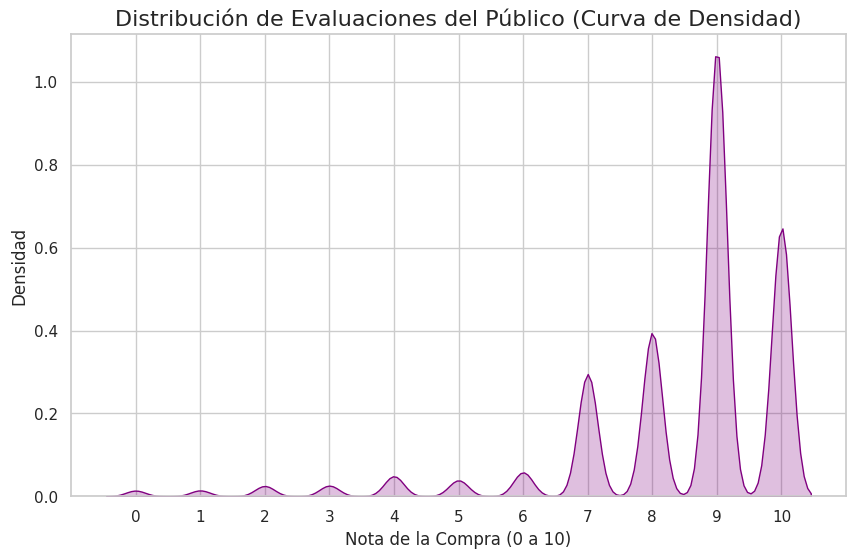

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn
sns.set(style="whitegrid")

# Crear el gr√°fico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='nota', fill=True, color='purple', bw_adjust=0.5)

# Etiquetas y t√≠tulo
plt.title('Distribuci√≥n de Evaluaciones del P√∫blico (Curva de Densidad)', fontsize=16)
plt.xlabel('Nota de la Compra (0 a 10)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.xticks(range(0, 11))

# Mostrar el gr√°fico
plt.show()


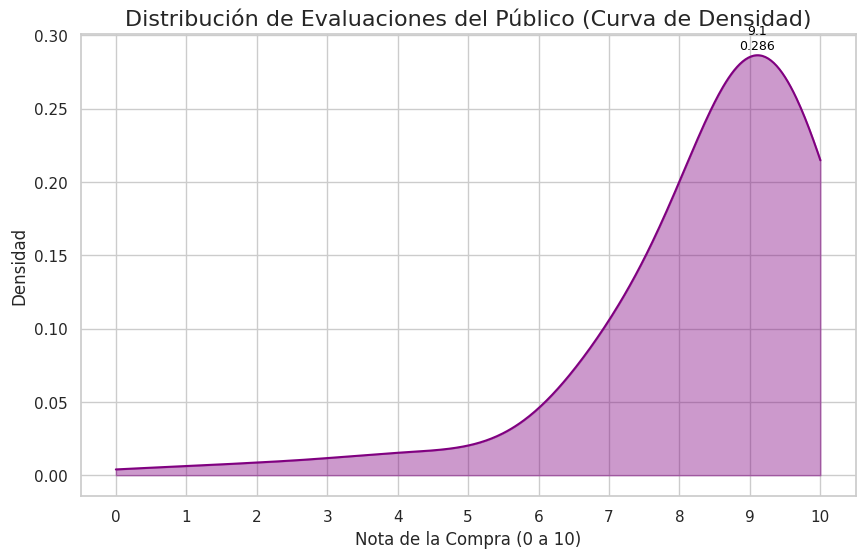

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde

# Estilo
sns.set(style="whitegrid")

# Datos (suponemos que df ya existe y tiene la columna 'nota')
notas = df['nota'].dropna()

# Calcular la KDE usando scipy
kde = gaussian_kde(notas, bw_method=0.5)
x_vals = np.linspace(0, 10, 500)
y_vals = kde(x_vals)

# Encontrar picos
peaks, _ = find_peaks(y_vals)

# Crear gr√°fico
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color='purple')
plt.fill_between(x_vals, y_vals, alpha=0.4, color='purple')

# Etiquetas en los picos
for i in peaks:
    x_peak = x_vals[i]
    y_peak = y_vals[i]
    plt.text(x_peak, y_peak + 0.002, f"{x_peak:.1f}\n{y_peak:.3f}",
             ha='center', va='bottom', fontsize=9, color='black')

# Est√©tica
plt.title('Distribuci√≥n de Evaluaciones del P√∫blico (Curva de Densidad)', fontsize=16)
plt.xlabel('Nota de la Compra (0 a 10)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.xticks(range(0, 11))
plt.grid(True)
plt.show()


In [263]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

# Datos
notas = df['nota'].dropna()

# Calcular KDE
kde = gaussian_kde(notas, bw_method=0.5)
x_vals = np.linspace(0, 10, 500)
y_vals = kde(x_vals)

# Crear gr√°fico interactivo
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    fill='tozeroy',
    line=dict(color='purple'),
    hovertemplate='Nota: %{x:.1f}<br>Densidad: %{y:.3f}<extra></extra>',
    name='Curva de Densidad'
))

# Personalizaci√≥n
fig.update_layout(
    title='Distribuci√≥n de Evaluaciones del P√∫blico (Curva de Densidad)',
    xaxis_title='Nota de la Compra (0 a 10)',
    yaxis_title='Densidad',
    template='simple_white',
    hoverlabel=dict(bgcolor="white", font_size=12)
)

fig.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Una vez m√°s, no necesitamos especificar directamente el tipo de gr√°fico, ya que al mencionar la distribuci√≥n de valores num√©ricos de una simple columna, ChatGPT logr√≥ interpretar y proporcionar el c√≥digo para un histograma de columnas. Este gr√°fico es ideal para presentar la distribuci√≥n de una muestra de datos o poblaci√≥n. Cada columna aqu√≠ representa la frecuencia de repetici√≥n de un valor.

¬øTe gustar√≠a experimentar haciendo lo mismo solo con las edades?


### **7¬™ Pregunta:** ¬øC√≥mo est√° distribuida nuestra audiencia por edad y sexo biol√≥gico? ¬øExiste alg√∫n grupo que sobresalga?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de nuestra audiencia por edad y sexo biol√≥gico.

En "df", tenemos las columnas:
* edad: edad de la persona que realiz√≥ la compra
* sexo_biologico: sexo biol√≥gico de la persona que realiz√≥ la compra, con datos categ√≥ricos

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


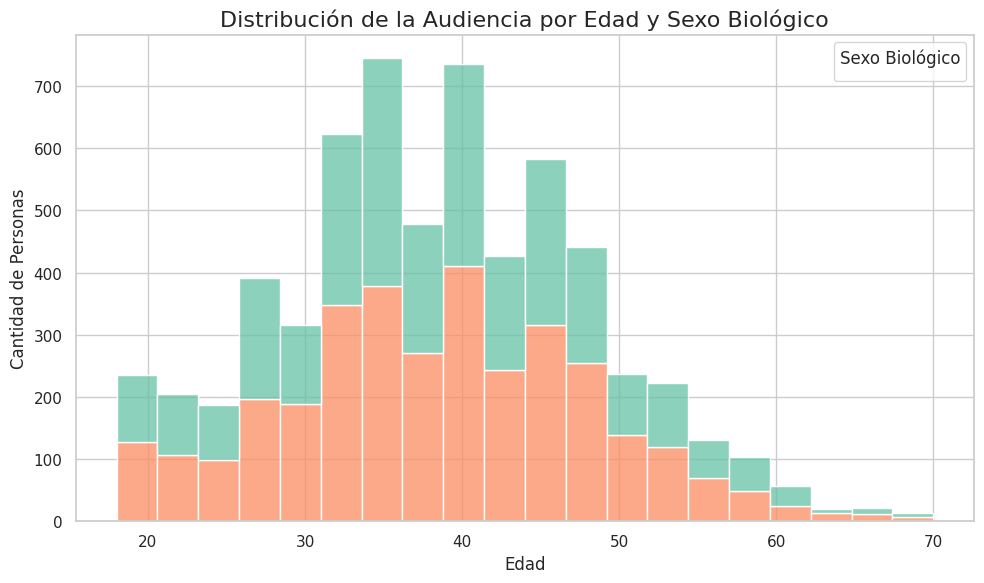

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style="whitegrid")

# Crear gr√°fico
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='edad', hue='sexo_biologico', multiple='stack', bins=20, palette='Set2')

# Etiquetas
plt.title('Distribuci√≥n de la Audiencia por Edad y Sexo Biol√≥gico', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.legend(title='Sexo Biol√≥gico')
plt.tight_layout()
plt.show()


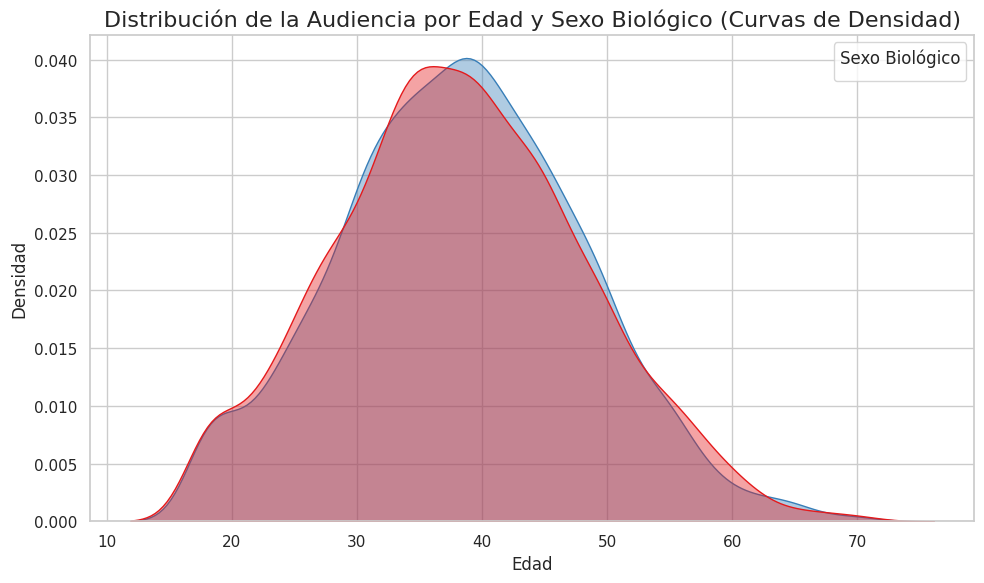

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='edad', hue='sexo_biologico', fill=True, common_norm=False, palette='Set1', alpha=0.4)

# Etiquetas
plt.title('Distribuci√≥n de la Audiencia por Edad y Sexo Biol√≥gico (Curvas de Densidad)', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Sexo Biol√≥gico')
plt.tight_layout()
plt.show()


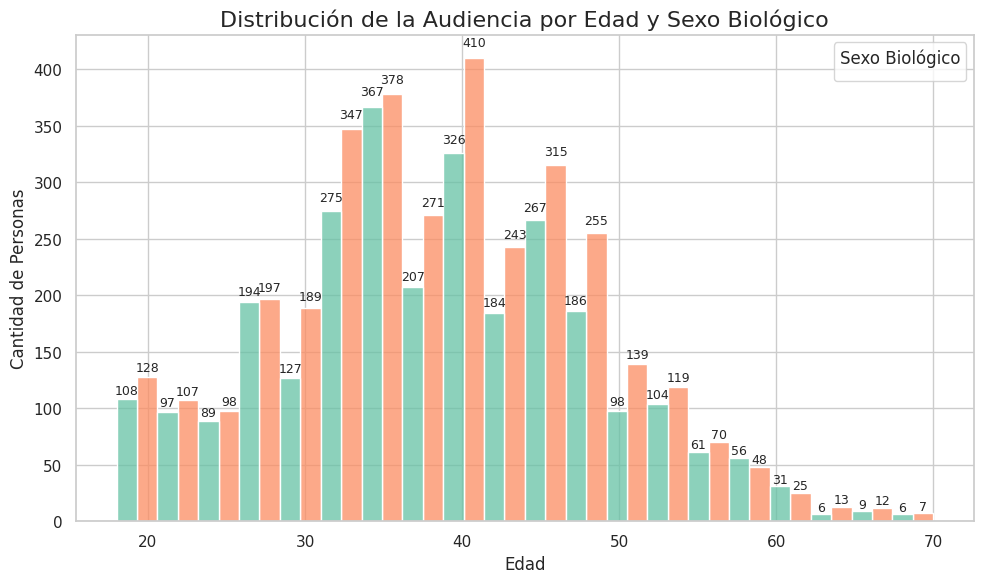

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df,
    x='edad',
    hue='sexo_biologico',
    multiple='dodge',     # barras lado a lado
    bins=20,
    palette='Set2'
)

# A√±adir etiquetas encima de las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + height * 0.02,   # desplazamiento proporcional
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Etiquetas y est√©tica
plt.title('Distribuci√≥n de la Audiencia por Edad y Sexo Biol√≥gico', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.legend(title='Sexo Biol√≥gico')
plt.tight_layout()
plt.show()



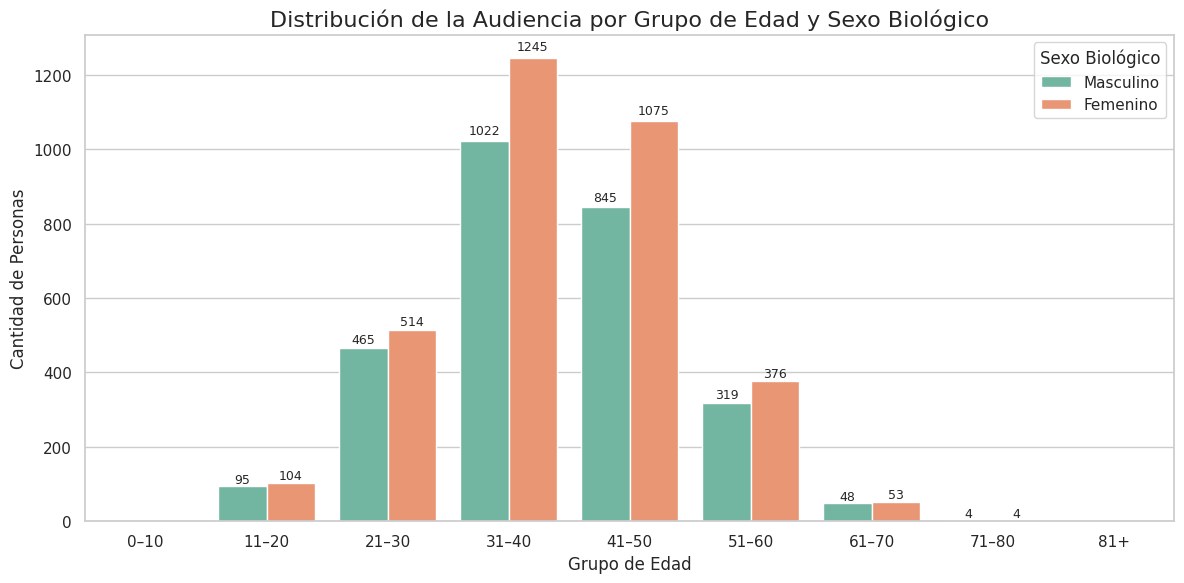

In [267]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear categor√≠as de edad (bins) y etiquetas
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0‚Äì10', '11‚Äì20', '21‚Äì30', '31‚Äì40', '41‚Äì50', '51‚Äì60', '61‚Äì70', '71‚Äì80', '81+']

# Crear nueva columna con grupos de edad
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Ordenar las categor√≠as para que el eje X est√© en orden correcto
df['grupo_edad'] = df['grupo_edad'].cat.reorder_categories(labels, ordered=True)

# Crear el gr√°fico
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='grupo_edad', hue='sexo_biologico', palette='Set2')

# A√±adir etiquetas de cantidad encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + height * 0.01,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Est√©tica
plt.title('Distribuci√≥n de la Audiencia por Grupo de Edad y Sexo Biol√≥gico', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.legend(title='Sexo Biol√≥gico')
plt.tight_layout()
plt.show()


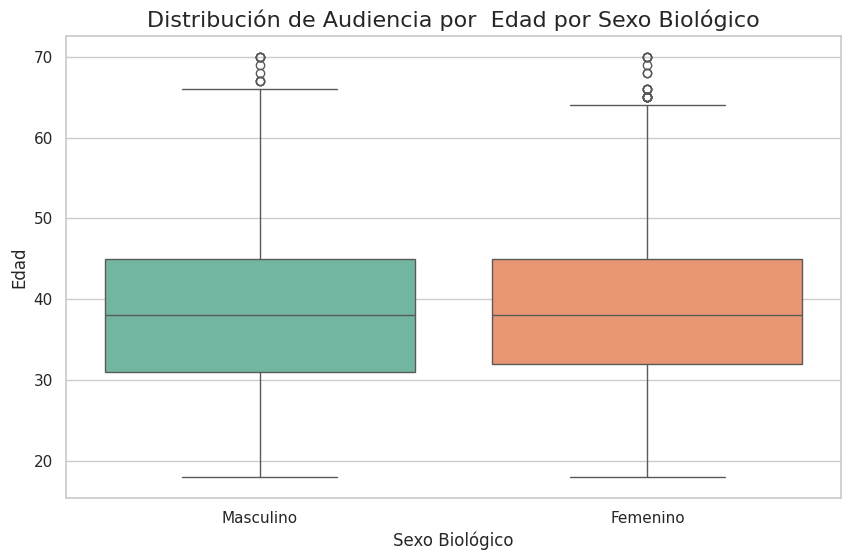

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x='sexo_biologico', y='edad', data=df , palette='Set2')

plt.title('Distribuci√≥n de Audiencia por  Edad por Sexo Biol√≥gico', fontsize=16)
plt.xlabel('Sexo Biol√≥gico', fontsize=12)
plt.ylabel('Edad', fontsize=12)

plt.show()

###**Desafio perfil de los clientes**

#### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tengo una nueva solicitud de Zoop para generar 2 visuales, siendo uno de ellos relacionado al registro de clientes para un nuevo servicio que Zoop implementar√°, "el Zoop Pay"
Se incluyen los datasets:
    clientes ['ID_compra', 'ID_cliente', 'ciudad', 'estado', 'region', 'edad', 'sexo_biologico', 'cashback', 'nota'],
    ventas ['ID_compra', 'fecha', 'horario', 'categoria', 'precio_unitario','cantidad', 'envio', 'metodo_pago']
    zoop_pay ['ID_cliente', 'zoop_pay'] No/S√≠
Los 3 se unen por ID_cliente
A zoop le gustar√≠a saber cu√°l es el porcentaje de personas que ya est√°n pre-registradas para este producto. El e-commerce busca comprender este n√∫mero para definir la necesidad de promoci√≥n y esfuerzo para atraer m√°s clientes a esta funcionalidad.
Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

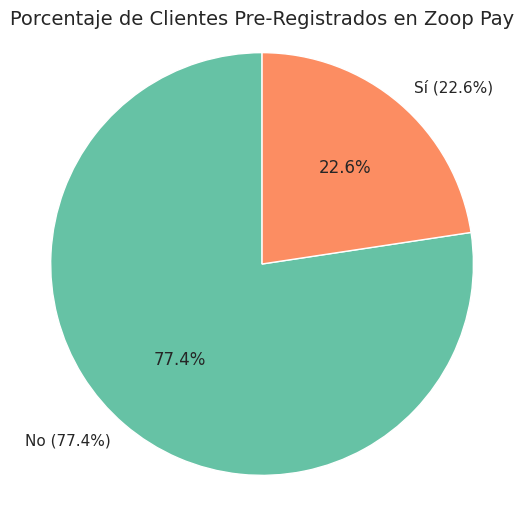

In [269]:
#Desafio 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"
clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
zoop_pay = pd.read_csv(url_zoop_pay)

# Supongamos que ya cargaste los DataFrames: clientes, ventas, zoop_pay

# Unir los datasets (en este caso solo clientes y zoop_pay son necesarios)
df_merged = pd.merge(clientes, zoop_pay, on='ID_cliente', how='left')

# Contar cantidad por estado de registro
conteo = df_merged['zoop_pay'].value_counts().rename_axis('Estado de Registro').reset_index(name='Cantidad')

# Calcular porcentaje
total = conteo['Cantidad'].sum()
conteo['Porcentaje'] = conteo['Cantidad'] / total * 100
plt.figure(figsize=(6, 6))
colors = ['#66c2a5', '#fc8d62']  # verde y naranja

plt.pie(
    conteo['Cantidad'],
    labels=[f"{row['Estado de Registro']} ({row['Porcentaje']:.1f}%)" for _, row in conteo.iterrows()],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
plt.title('Porcentaje de Clientes Pre-Registrados en Zoop Pay', fontsize=14)
plt.axis('equal')
plt.show()



#### <strong><font color="7b71ff" size=6>Prompt:</font></strong>
Solicitud a ChatGPT
A la opci√≥n A: le puedes agregar las cantidades de Si / No y el total de registros?

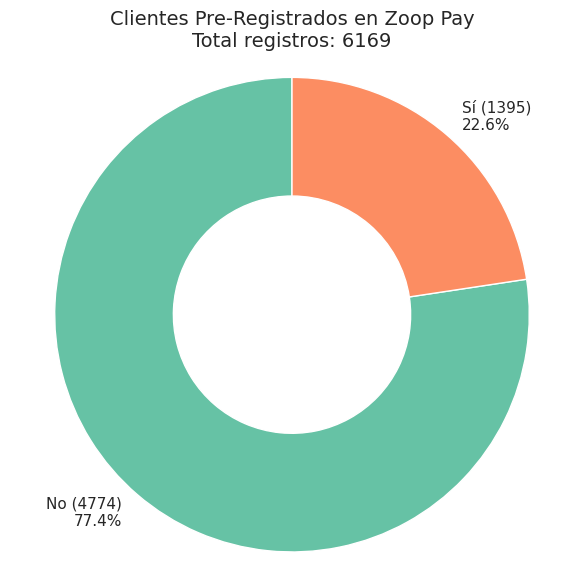

In [270]:
import matplotlib.pyplot as plt

# Calcular total
total = conteo['Cantidad'].sum()

# Crear etiquetas personalizadas con estado, cantidad y porcentaje
labels = [
    f"{row['Estado de Registro']} ({row['Cantidad']})\n{row['Porcentaje']:.1f}%"
    for _, row in conteo.iterrows()
]

# Gr√°fico de pastel
plt.figure(figsize=(6, 6))
colors = ['#66c2a5', '#fc8d62']  # verde y naranja

plt.pie(
    conteo['Cantidad'],
    labels=labels,
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.5),  # Donut-style opcional
)

# T√≠tulo con total
plt.title(f'Clientes Pre-Registrados en Zoop Pay\nTotal registros: {total}', fontsize=14)
plt.axis('equal')  # Mantiene la forma circular
plt.tight_layout()
plt.show()


#### <strong><font color="7b71ff" size=6>Prompt:</font></strong>
Desafio 2

Zoop quiere analizar la distribuci√≥n de las edades de los clientes por regi√≥n con el fin de delinear una "persona" (perfil) de su clientela en diferentes localidades del pa√≠s, y para ello, solicit√≥ un visual que distribuya estos datos. Necesito un visual que muestre la distribuci√≥n de las edades de los clientes por regi√≥n.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


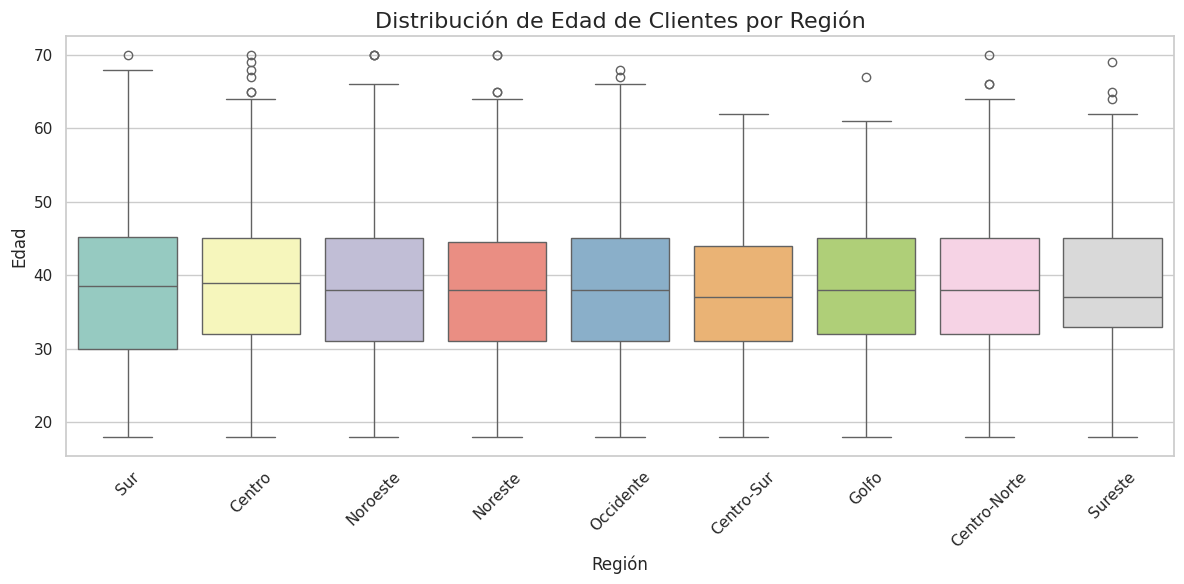

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(data=clientes, x='region', y='edad', palette='Set3')

# Est√©tica
plt.title('Distribuci√≥n de Edad de Clientes por Regi√≥n', fontsize=16)
plt.xlabel('Regi√≥n', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


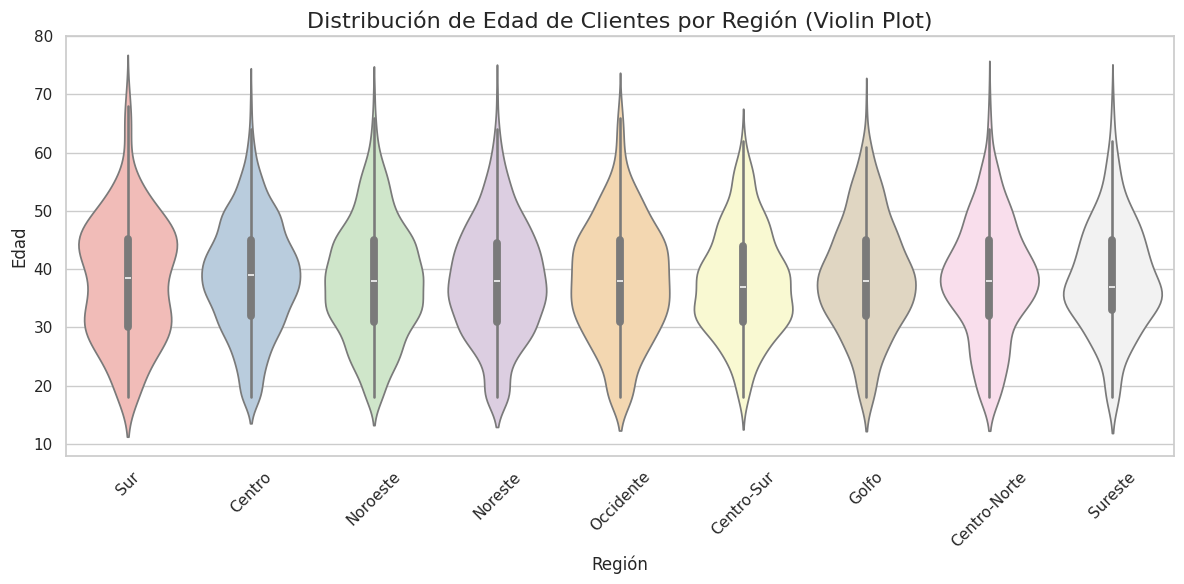

In [272]:
#Segunda Opci√≥n
plt.figure(figsize=(12, 6))
sns.violinplot(data=clientes, x='region', y='edad', palette='Pastel1', inner='box')

plt.title('Distribuci√≥n de Edad de Clientes por Regi√≥n (Violin Plot)', fontsize=16)
plt.xlabel('Regi√≥n', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [273]:
#Version interactiva
import plotly.express as px

# Crear gr√°fico interactivo
fig = px.box(
    clientes,
    x='region',
    y='edad',
    points='all',  # Muestra todos los puntos individuales
    color='region',
    title='Distribuci√≥n de Edad de Clientes por Regi√≥n',
    labels={'region': 'Regi√≥n', 'edad': 'Edad'},
    template='plotly_white'
)

# Ajustar dise√±o
fig.update_traces(marker=dict(opacity=0.5, size=5))
fig.update_layout(
    xaxis_title='Regi√≥n',
    yaxis_title='Edad',
    showlegend=False
)

fig.show()


<font color="7b71ff" size=4> Comentarios: </font>

---
El gr√°fico generado es poco pr√°ctico, ya que compila los datos del sexo biol√≥gico 'Masculino' y 'Femenino' en el gr√°fico de viol√≠n. Necesitamos darle una instrucci√≥n adicional a GPT para elegir un visual m√°s adecuado.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Creo que podemos mejorar este gr√°fico. ¬øQu√© te parece cambiar a un boxplot?


<font color="7b71ff" size=4> Comentarios: </font>

---

Esta vez fue necesario guiar a la IA para generar una visualizaci√≥n mejor para nuestros an√°lisis.

El gr√°fico representado es un boxplot (diagrama de caja) que es ideal para representar un conjunto de datos de acuerdo con 5 medidas de inter√©s: valor m√°ximo, m√≠nimo, 1¬∫ cuartil (donde est√°n situados el 25% de los datos), 2¬∫ cuartil o mediana (donde est√°n situados el 50% de los datos) y 3¬∫ cuartil (donde est√°n situados el 75% de los datos).

¬øRecuerdas el `describe()`? Este gr√°fico presenta en un solo elemento gran parte de los datos que la funci√≥n muestra en tabla.

Concluimos la 1¬™ versi√≥n de los 7 visuales que utilizaremos en nuestro proyecto. Ahora, pasaremos a la aplicaci√≥n de las t√©cnicas de storytelling para mejorar los visuales y adaptarlos a la identidad visual de Zoop antes de la exportaci√≥n.


## **4.1 - Definiendo los colores del proyecto**

---


Ahora, vamos a explorar la importancia de los colores en la visualizaci√≥n de datos, discutir c√≥mo las personas perciben e interpretan la informaci√≥n visual, y abordar la diferencia entre la capacidad de la inteligencia artificial y la visi√≥n humana en lo que respecta a la elecci√≥n de colores y accesibilidad.



### Paleta de colores de Zoop:

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/zoop_paleta_cores.png" alt="inserir alt" width=480>

&nbsp;

#### Paleta del proyecto

|Rojo|||
|------|------|------|
| Rojo_1 |Rojo_2 |Rojo_3 |
|#e23155 | #cc2c4e| #b32742 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_3.png) |

&nbsp;

|Azul|||
|------|------|------|
| AZUL_1 |AZUL_2 |AZUL_3 |
|#203f75 | #1c3867| #19325b |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_3.png) |

&nbsp;

|Gris||||||
|------|------|------|------|------|------|
|BLANCO| GRIS_1 |GRIS_2 |GRIS_3 |GRIS_4 |GRIS_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|

&nbsp;

|Aqua|||
|------|------|------|
| AQUA_1 |AQUA_2 |AQUA_3 |
|#addcd4 | #9fccc5| #96bfb9 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_3.png) |

&nbsp;


In [274]:
# Adicionamos los colores al proyecto
ROJO_1,	ROJO_2,	ROJO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

<font size=5> ***¬øPor qu√© definimos nosotros mismos los colores del proyecto?*** </font>


1. **Percepci√≥n humana de los colores:**

Nuestro cerebro interpreta los colores de manera √∫nica, asociando emociones y significados a cada tonalidad. Es importante, al elegir los colores para representar datos, considerar la percepci√≥n humana para asegurar que la informaci√≥n se transmita de manera clara y eficaz. Adem√°s de seguir la identidad visual de Zoop, es decir, dar esa sensaci√≥n de que el visual es de Zoop.

2. **Accesibilidad:**

Ciertas combinaciones de colores pueden ser dif√≠ciles de percibir para personas con deficiencias visuales. Nuestra responsabilidad como desarrolladores es garantizar que nuestras visualizaciones sean inclusivas. Aqu√≠ seguiremos algunas directrices y recomendaciones para crear gr√°ficos accesibles.

3. **IA vs. elecci√≥n de colores:**

Mientras que la IA puede realizar tareas complejas, como an√°lisis de datos y reconocimiento de patrones, a√∫n no posee el discernimiento humano cuando se trata de elegir colores significativos y garantizar la accesibilidad. Aqu√≠ es donde entra nuestra intervenci√≥n creativa y consideraci√≥n humana.

4. **Experiencia visual:**

¬øLas personas pueden entender la informaci√≥n transmitida por los gr√°ficos? ¬øExiste alg√∫n "conflicto" entre los colores que perjudica la claridad del mensaje? Vamos a explorar t√©cnicas para mejorar la experiencia visual, como el contraste adecuado, la elecci√≥n cuidadosa de los colores de la paleta y el destaque de elementos clave.

¬øVamos ahora a sumergirnos en la pr√°ctica e incorporar estos conceptos a nuestro proyecto?


## **4.2 - A√±adiendo etiquetas y r√≥tulos**

Ya hemos creado anteriormente los 7 visuales y definido los colores del proyecto. Ahora, vamos a elegir solo uno de los visuales para comprender c√≥mo podemos utilizar la IA para agregar los colores ideales, las etiquetas de los datos, t√≠tulos y etiquetas de los ejes.

Entonces, tomaremos el c√≥digo de ese primer gr√°fico (M√©todos de pago utilizados) y exploraremos estos cambios a trav√©s de la utilizaci√≥n de la IA.

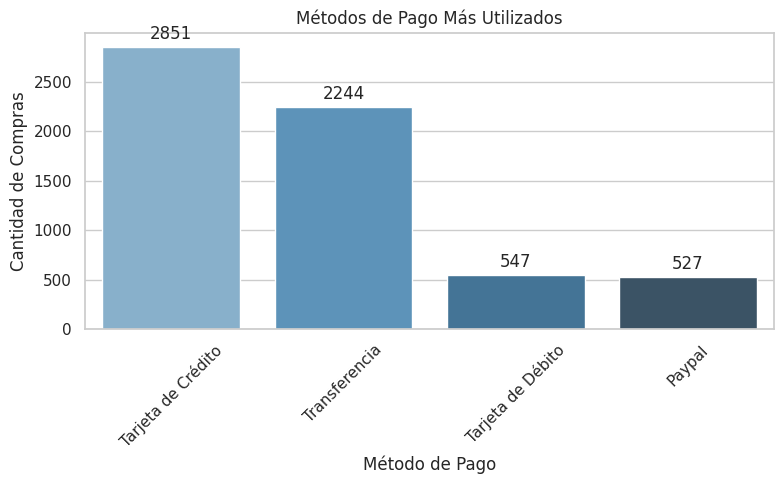

In [275]:
# 1. Crear la tabla resumen de m√©todos de pago
metodos_de_pago = df['metodo_pago'].value_counts().reset_index()
metodos_de_pago.columns = ['metodo_pago', 'cantidad']

# 2. Visualizaci√≥n de los m√©todos de pago
plt.figure(figsize=(8, 5))
#sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', palette='Blues_d')
ax = sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', palette='Blues_d')

# Agregar los valores arriba de cada barra
for i in ax.containers:
  ax.bar_label(i, fmt='%.0f', label_type='edge', padding=3)

plt.title('M√©todos de Pago M√°s Utilizados')
plt.xlabel('M√©todo de Pago')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora lleg√≥ el momento de refinar nuestras visualizaciones. Comencemos con el primer gr√°fico que hicimos, el de los m√©todos de pago.

Nuestro gr√°fico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las columnas en el color ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "M√©todos de pago m√°s utilizados en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben ser suprimidas as√≠ como la etiqueta del eje y (ylabel) y las etiquetas, y la etiqueta del eje x (xticks y xlabel) deben tener tama√±o 12 con el color AZUL_1. Los bordes superior, derecho e izquierdo del gr√°fico deben ser suprimidos.

Adem√°s, es necesario mostrar el total de cada m√©todo de pago encima de cada columna, con el texto tambi√©n en el color AZUL_1 y tama√±o 12.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n. Recuerda que las variables de los colores que estamos utilizando tienen valores de colores ya en hexadecimal.

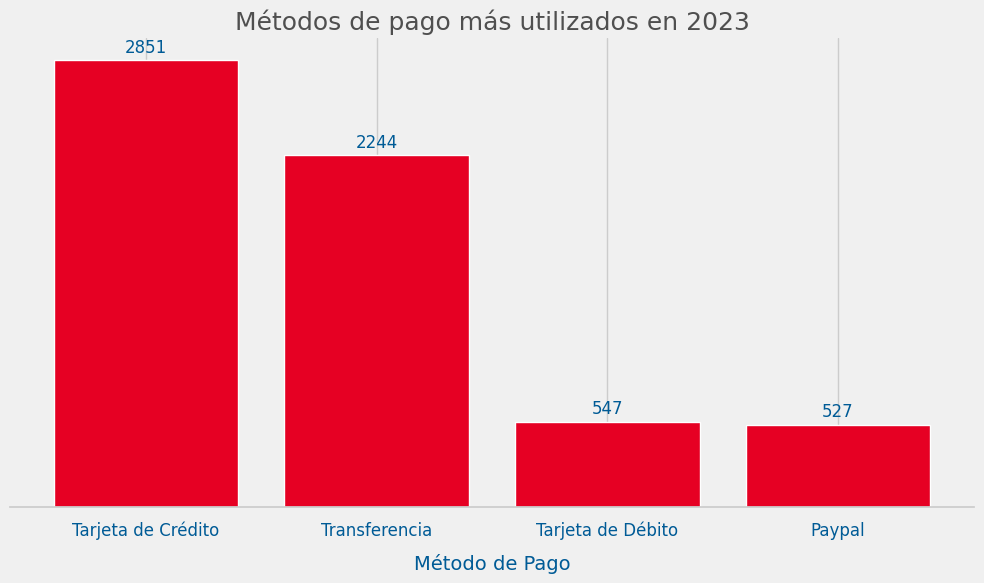

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Colores institucionales
GRIS_1 = "#F0F0F0"
GRIS_5 = "#4F4F4F"
ROJO_1 = "#E60023"
AZUL_1 = "#005B96"

# Contar los m√©todos de pago
conteo_pago = ventas['metodo_pago'].value_counts().reset_index()
conteo_pago.columns = ['metodo_pago', 'cantidad']

# Estilo Seaborn y fondo personalizado
sns.set(style="whitegrid")

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(GRIS_1)  # Fondo de la figura
ax.set_facecolor(GRIS_1)         # Fondo del √°rea del gr√°fico

# Barras
bars = ax.bar(
    conteo_pago['metodo_pago'],
    conteo_pago['cantidad'],
    color=ROJO_1
)

# T√≠tulo personalizado
plt.title("M√©todos de pago m√°s utilizados en 2023", fontsize=18, color=GRIS_5)

# Suprimir eje Y
ax.set_ylabel('')
ax.set_yticks([])

# Estilo del eje X

ax.set_xlabel('M√©todo de Pago', fontsize=14, color=AZUL_1, labelpad=10)
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)

# Eliminar bordes superior, derecho e izquierdo
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# A√±adir etiquetas de cantidad encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(conteo_pago['cantidad']) * 0.01,
        f"{height:.0f}",
        ha='center',
        va='bottom',
        fontsize=12,
        color=AZUL_1
    )

plt.tight_layout()
plt.show()


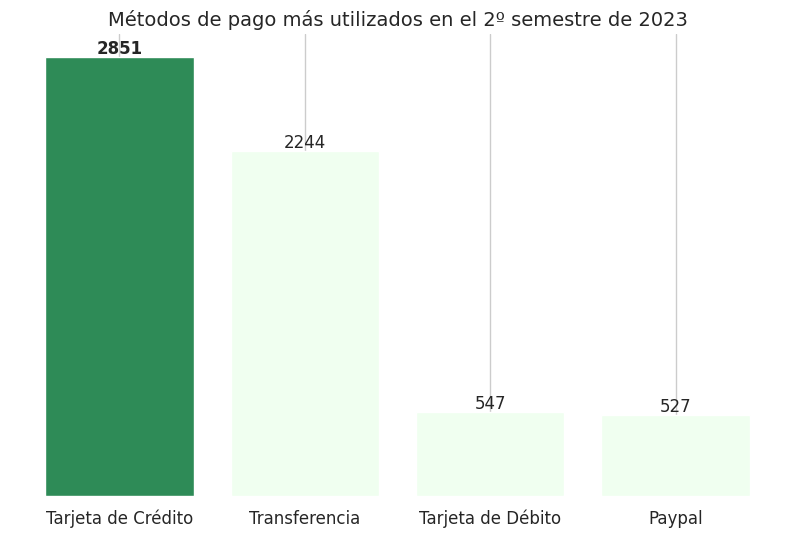

In [277]:
#Podemos observar a trav√©s del prompt que solo la columna con el mayor valor
#tendr√° un destaque tanto en el color de la barra como en el valor.
#Este comportamiento puede ser visto en el visual generado por el c√≥digo retornado por ChatGPT:


import matplotlib.pyplot as plt

metodos_pago = df['metodo_pago'].value_counts()
metodo_mas_utilizado = metodos_pago.idxmax()
colores = ['honeydew'] * len(metodos_pago)
colores[metodos_pago.index.get_loc(metodo_mas_utilizado)] = 'seagreen'

plt.figure(figsize=(10, 6))
plt.bar(metodos_pago.index, metodos_pago.values, color=colores)

for i, valor in enumerate(metodos_pago.values):
    plt.text(i, valor + 20, str(valor), ha='center', fontsize=12, weight='bold' if valor == metodos_pago.max() else 'normal')

plt.title('M√©todos de pago m√°s utilizados en el 2¬∫ semestre de 2023', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([])
plt.ylim(0, 3000)
plt.xlabel('')
plt.ylabel('')
plt.gca().spines[['top', 'right','left', 'bottom']].set_visible(False)
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
¬°Vaya! Parece otro gr√°fico, ¬øverdad?

Eliminamos muchos elementos distractores y a√±adimos solo la informaci√≥n que nos interesaba. Adem√°s, cambiamos el dise√±o de un estado gen√©rico a un formato que se ajusta a la identidad de Zoop, dejando nuestro gr√°fico listo para ser utilizado, por ejemplo, en el informe de ventas.

M√°s adelante aplicaremos estas acciones a los otros visuales. Nuestro enfoque aqu√≠ es entender las t√©cnicas de storytelling y c√≥mo combinarlas con la IA puede ser bastante √∫til.


## **4.3 - A√±adiendo textos**

---


Ya hemos refinado uno de los gr√°ficos en la etapa anterior. Ahora, vamos a traer ese gr√°fico, a√±adiendo un elemento m√°s que puede ser importante para los an√°lisis: textos informativos. Utilizaremos la IA nuevamente para este proceso.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬°El gr√°fico qued√≥ muy bien!

Ahora quiero a√±adir un texto dentro del √°rea del gr√°fico, ¬øvamos all√°?

Para ello, suma los valores de las dos primeras columnas, divide por la suma de todas las columnas y convierte a formato de porcentaje, almacenando en la variable "porcentaje".

Ahora, en la posici√≥n x=1.5 y y=2500, a√±ade el siguiente texto con tama√±o 10 y color AZUL_3: f"$\\bf{porcentaje:.2f}$% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \npara el pago. Ser√≠a interesante considerar asociaciones con \nbancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \na nuestra clientela.".

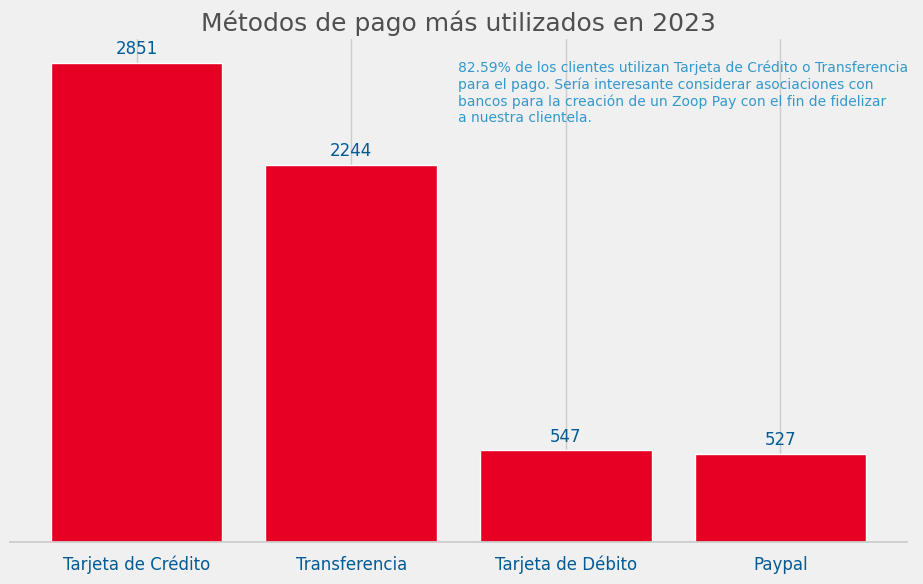

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Colores institucionales
GRIS_1 = "#F0F0F0"
GRIS_5 = "#4F4F4F"
ROJO_1 = "#E60023"
AZUL_1 = "#005B96"
AZUL_3 = "#3399CC"  # Definimos un azul m√°s claro como AZUL_3

# Contar los m√©todos de pago
conteo_pago = ventas['metodo_pago'].value_counts().reset_index()
conteo_pago.columns = ['metodo_pago', 'cantidad']

# Calcular porcentaje de los dos primeros m√©todos de pago
suma_dos_primeros = conteo_pago['cantidad'][:2].sum()
suma_total = conteo_pago['cantidad'].sum()
porcentaje = (suma_dos_primeros / suma_total) * 100

# Estilo Seaborn y fondo personalizado
sns.set(style="whitegrid")

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(GRIS_1)  # Fondo de la figura
ax.set_facecolor(GRIS_1)         # Fondo del √°rea del gr√°fico

# Barras
bars = ax.bar(
    conteo_pago['metodo_pago'],
    conteo_pago['cantidad'],
    color=ROJO_1
)

# T√≠tulo personalizado
plt.title("M√©todos de pago m√°s utilizados en 2023", fontsize=18, color=GRIS_5)

# Suprimir eje Y
ax.set_ylabel('')
ax.set_yticks([])

# Estilo del eje X
ax.set_xlabel('')
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)

# Eliminar bordes superior, derecho e izquierdo
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# A√±adir etiquetas de cantidad encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(conteo_pago['cantidad']) * 0.01,
        f"{height:.0f}",
        ha='center',
        va='bottom',
        fontsize=12,
        color=AZUL_1
    )

# A√±adir texto explicativo dentro del gr√°fico
texto = (
    f"{porcentaje:.2f}% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \n"
    "para el pago. Ser√≠a interesante considerar asociaciones con \n"
    "bancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \n"
    "a nuestra clientela."
)
ax.text(
    1.5, 2500,  # Ajusta la coordenada y si tus valores son muy diferentes
    texto,
    fontsize=10,
    color=AZUL_3
)

plt.tight_layout()
plt.show()



<font color="7b71ff" size=4> Comentarios: </font>

---

Aprovechamos el √°rea √∫til para presentar una *idea* que tuvimos al describir los datos de los m√©todos de pago. Esto aumenta significativamente la relevancia de los datos representados y proporciona m√°s informaci√≥n a quien lo lee.


## **4.4 - Agregar elementos visuales**

---


¬øQu√© tal el uso de textos informativos, verdad? ¬øY si ahora a√±adimos otros elementos visuales a uno de nuestros gr√°ficos?

Vamos a elegir ahora el gr√°fico de l√≠neas (Ventas totales mensuales de Zoop) y aplicar una t√©cnica m√°s a √©l mediante el uso de la IA.


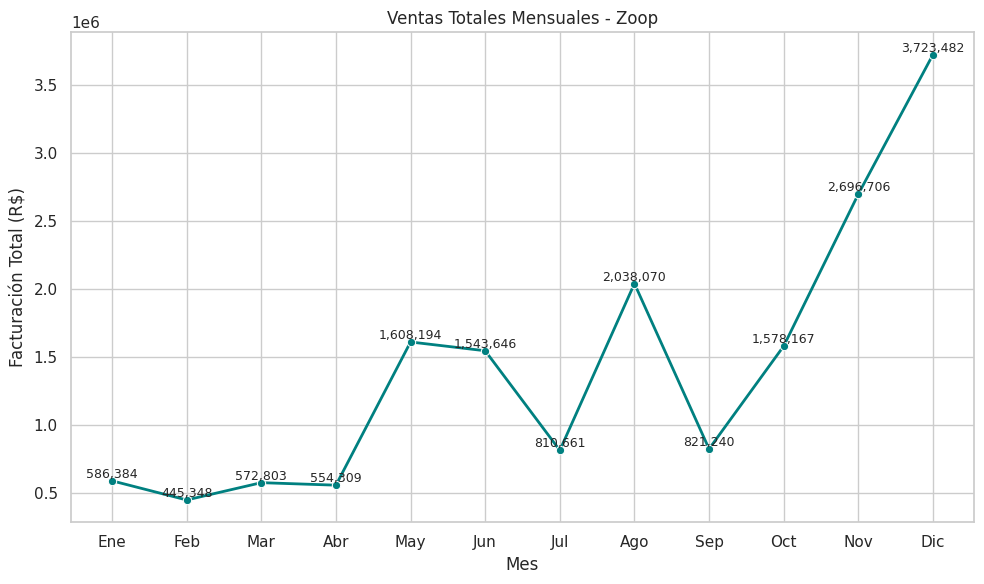

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de traducci√≥n de meses
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# 1. Asegurarse de tener la columna de facturaci√≥n
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# Asegurarse de que la columna 'fecha' est√© en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# 2. Extraer el mes de la fecha
df['mes_num'] = df['fecha'].dt.month
df['mes_nombre'] = df['fecha'].dt.month_name()

# 3. Agrupar por mes (num√©rico para ordenar correctamente) y sumar la facturaci√≥n
ventas_mensuales = df.groupby(['mes_num', 'mes_nombre'])['facturacion'].sum().reset_index()

# 4. Traducir el nombre del mes al espa√±ol
ventas_mensuales['mes'] = ventas_mensuales['mes_nombre'].map(meses)

# 5. Ordenar los meses por n√∫mero
ventas_mensuales = ventas_mensuales.sort_values('mes_num')

# 6. Graficar
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x='mes', y='facturacion', marker='o', linewidth=2, color='teal')
# Agregar etiquetas de valor sobre cada punto
for i in range(len(ventas_mensuales)):
    plt.text(
        x=ventas_mensuales['mes'].iloc[i],
        y=ventas_mensuales['facturacion'].iloc[i] + 100,  # Ajuste para no tapar el punto
        s=f"{ventas_mensuales['facturacion'].iloc[i]:,.0f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Ventas Totales Mensuales - Zoop')
plt.xlabel('Mes')
plt.ylabel('Facturaci√≥n Total (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬øVamos a explorar otro de los gr√°ficos que hicimos? Ahora vamos a utilizar el de Ventas totales mensuales de Zoop. La variable que pasa los valores mensuales es:
```
ventas_mensuales = df.groupby(df['fecha'].dt.to_period('M'))['facturacion'].sum().reset_index()
```
Pero debes sustituirla por:
```
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
```
En el que `df['fecha']` corresponde a las fechas en formato datetime y `df['facturacion']` a los valores de las ventas.

Y lo que gener√≥ el gr√°fico original fue:

```
sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', sort=False)
```
Pero debes utilizar √∫nicamente la biblioteca matplotlib con la creaci√≥n del gr√°fico siguiendo este ejemplo:

```
plt.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color='#1890FF', linewidth=2)
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en color GRIS_1, la l√≠nea en color AZUL_1 y el tama√±o de la figura debe ser de (12, 6).

El t√≠tulo de la figura es "Ventas totales mensuales en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben estar en el formato "MXN$ valor M" con dos decimales, tama√±o 12 y color AZUL_1.

Las etiquetas del eje X (xticks) deben tener tama√±o 12 con color AZUL_1. Los labels de los ejes x e y (xlabel e ylabel) deben ser suprimidos. Los bordes del gr√°fico en la parte superior y el lado derecho deben ser suprimidos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n. Recuerda que las variables de colores que estamos utilizando tienen valores de colores ya en hexadecimal.


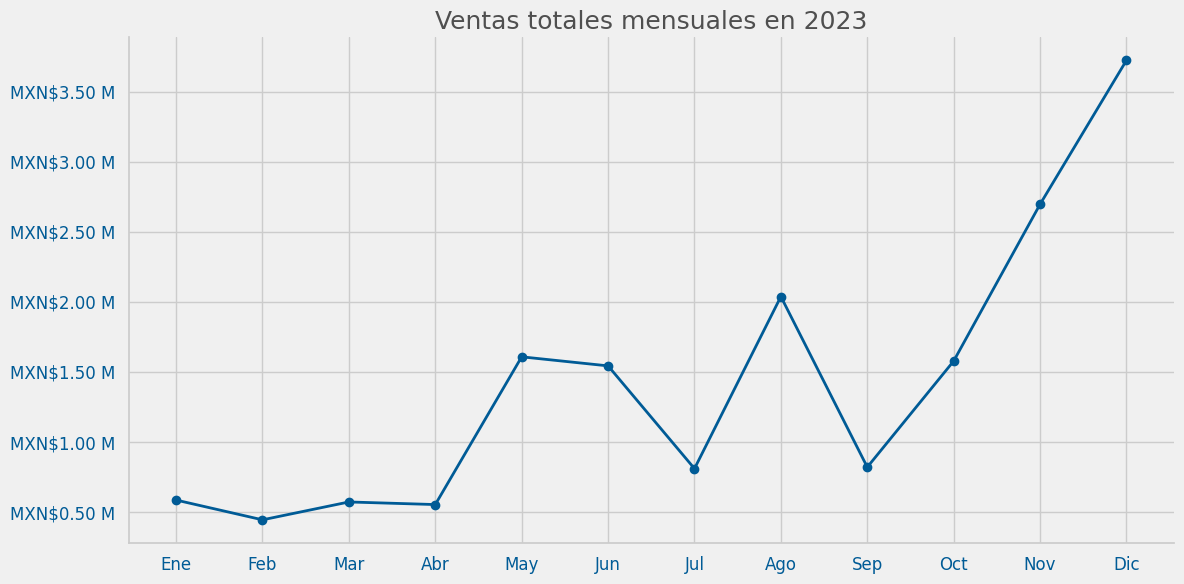

In [280]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Colores institucionales
GRIS_1 = "#F0F0F0"
GRIS_5 = "#4F4F4F"
AZUL_1 = "#005B96"

# Diccionario de meses ordenados (en espa√±ol o ingl√©s seg√∫n idioma de sistema)
"""meses = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
"""
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}


# Crear columna de mes como string
df['mes'] = df['fecha'].dt.strftime('%B')  # o '%B' si tu sistema est√° en ingl√©s

# Agrupar y ordenar
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())

# Crear figura
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# Dibujar la l√≠nea
ax.plot(
    ventas_mensuales.index,
    ventas_mensuales.values,
    marker='o',
    color=AZUL_1,
    linewidth=2
)

# T√≠tulo del gr√°fico
plt.title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

# Suprimir etiquetas de los ejes
ax.set_xlabel('')
ax.set_ylabel('')

# Formato de los ticks del eje Y
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)

# Formatear los valores del eje Y como moneda
def formato_mxn(x, pos):
    return f"MXN${x / 1_000_000:.2f} M"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(formato_mxn))
#Configuraciones adicionales
plt.xticks(ventas_mensuales.index, [meses[mes] for mes in ventas_mensuales.index], fontsize=12, color=AZUL_1)

# Eliminar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬°Genial! Ahora que nuestro gr√°fico ya tiene la identidad visual, vamos a a√±adir algunos elementos visuales adicionales.

Dibuja 4 c√≠rculos de radio 200, transparentes con el borde en color ROJO_1 y con el centro en las coordenadas del 5¬∫, 8¬∫, 11¬∫ y 12¬∫ puntos, respectivamente. A la izquierda de cada c√≠rculo enumera del 1 al 4.


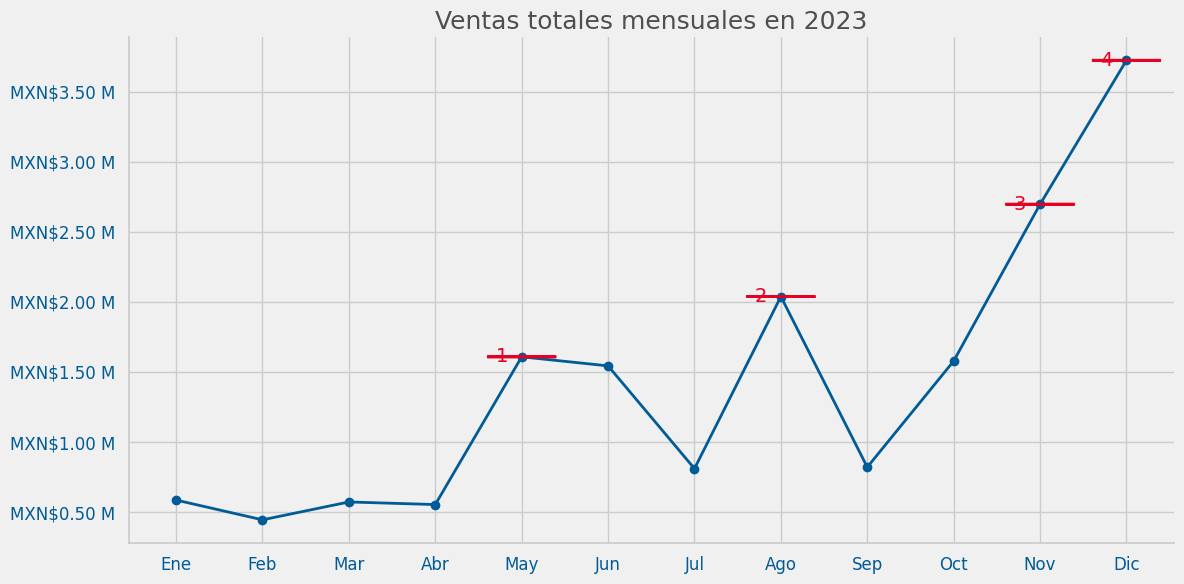

In [281]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Circle
from matplotlib.transforms import blended_transform_factory

# Colores institucionales
GRIS_1 = "#F0F0F0"
GRIS_5 = "#4F4F4F"
AZUL_1 = "#005B96"

# Diccionario de meses ordenados (en espa√±ol o ingl√©s seg√∫n idioma de sistema)
"""meses = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
"""
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}


# Crear columna de mes como string
df['mes'] = df['fecha'].dt.strftime('%B')  # o '%B' si tu sistema est√° en ingl√©s

# Agrupar y ordenar
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())

# Crear figura
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# Dibujar la l√≠nea
ax.plot(
    ventas_mensuales.index,
    ventas_mensuales.values,
    marker='o',
    color=AZUL_1,
    linewidth=2
)

# T√≠tulo del gr√°fico
plt.title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

# Suprimir etiquetas de los ejes
ax.set_xlabel('')
ax.set_ylabel('')

# Formato de los ticks del eje Y
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)

# Formatear los valores del eje Y como moneda
def formato_mxn(x, pos):
    return f"MXN${x / 1_000_000:.2f} M"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(formato_mxn))
#Configuraciones adicionales
plt.xticks(ventas_mensuales.index, [meses[mes] for mes in ventas_mensuales.index], fontsize=12, color=AZUL_1)

# Eliminar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ---- A√±adir c√≠rculos y n√∫meros ----
# √çndices 4, 7, 10, 11 para 5¬∫, 8¬∫, 11¬∫, 12¬∫ (base 0)
puntos_destacados = [4, 7, 10, 11]

# A√±adir c√≠rculos visibles y numeraci√≥n usando ax.plot (m√°s fiable con categor√≠as)
for i, idx in enumerate(puntos_destacados, start=1):
    x_val = ventas_mensuales.index[idx]
    y_val = ventas_mensuales.values[idx]

# Crear c√≠rculo con radio en puntos de pantalla, no en datos
    circle = Circle(
        (x_val, y_val),
        radius=0.4,  # controla el radio relativo; ajust√° si hace falta
        transform=ax.transData,
        facecolor='none',
        edgecolor=ROJO_1,
        linewidth=2,
        zorder=5
    )
    ax.add_patch(circle)
# Agregar n√∫mero con desplazamiento
    ax.annotate(
        str(i),
        xy=(x_val, y_val),
        xytext=(-10, 0),
        textcoords='offset points',
        ha='right',
        va='center',
        fontsize=14,
        color=ROJO_1
    )


plt.tight_layout()
plt.show()



<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos a√±adido 4 c√≠rculos que representan los puntos con mayor volumen de ventas de Zoop en 2023. Podemos plantear algunas hip√≥tesis:

1. En mayo, tenemos una de las fechas m√°s relevantes en ventas: el D√≠a de las Madres, lo que puede justificar el aumento en las ventas de Zoop.
2. En agosto, hay una situaci√≥n que pueden explicar el crecimiento: la vuelta a clases en el segundo semestre en algunos estados de Mexico.
3. En noviembre, destaca la Black Friday, uno de los principales per√≠odos de alta en las ventas, considerado de gran relevancia para el comercio minorista.
4. En diciembre, tenemos  las festividades de A√±o Nuevo, consideradas el per√≠odo de mayores ventas no solo para Zoop, sino para el comercio minorista en general.

La recomendaci√≥n es investigar m√°s a fondo los datos y llegar a tus propias conclusiones.


Antes de ajustar los √∫ltimos 5 visuales de nuestro proyecto, vamos a hacer una peque√±a modificaci√≥n en los 2 primeros, convirti√©ndolos en funciones, lo que facilitar√° m√°s adelante cuando realicemos la exportaci√≥n


###**Desaf√≠o: refinando las visualizaciones**

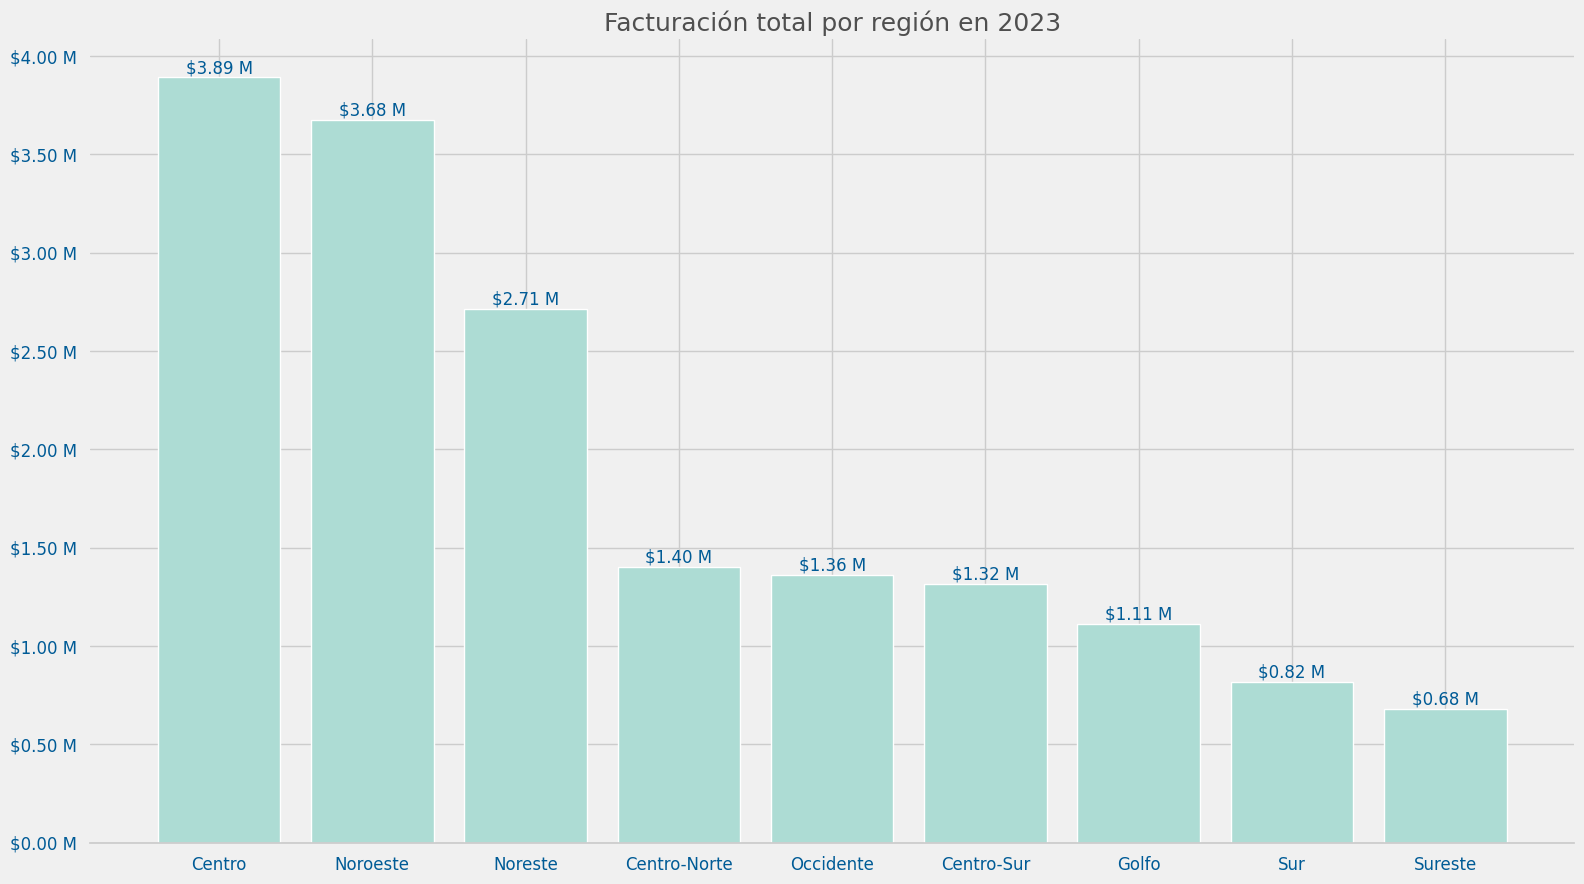

In [282]:
#Desafio 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Colores institucionales
GRIS_1 = "#F0F0F0"
AQUA_1 = "#addcd4"
GRIS_5 = "#4F4F4F"
AZUL_1 = "#005B96"

# Simulaci√≥n de ejemplo (si ya ten√©s df con columnas 'region' y 'facturacion', usalo directamente)
# df = pd.read_csv("ventas.csv")  # Tu dataframe real
# df = df[['region', 'facturacion']]  # Asegurate que tenga estas columnas

# Agrupar por regi√≥n
ventas_region = df.groupby('region')['facturacion'].sum().sort_values(ascending=False).reset_index()

# Crear figura
fig, ax = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

"""
AQUA_3 = "#76b5aa"
ventas_region['color'] = ventas_region['region'].apply(
    lambda x: AQUA_3 if x == "Ciudad de M√©xico" else AQUA_1
)
bars = ax.bar(
    ventas_region['region'],
    ventas_region['facturacion'],
    color=ventas_region['color']
)
"""

# Barras
bars = ax.bar(
    ventas_region['region'],
    ventas_region['facturacion'],
    color=AQUA_1
)

# T√≠tulo
ax.set_title(
    "Facturaci√≥n total por regi√≥n en 2023",
    fontsize=18,
    color=GRIS_5
)

# Etiquetas de ejes
ax.set_xlabel('')
ax.set_ylabel('')

# Estilo de ticks
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

# Eliminar bordes no necesarios
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Formato en millones para eje Y
def millones(x, pos):
    return f"${x / 1_000_000:.2f} M"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millones))

# A√±adir etiquetas sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"${height / 1_000_000:.2f} M",
        ha='center',
        va='bottom',
        fontsize=12,
        color=AZUL_1
    )

plt.tight_layout()
plt.show()


#Desafio 2


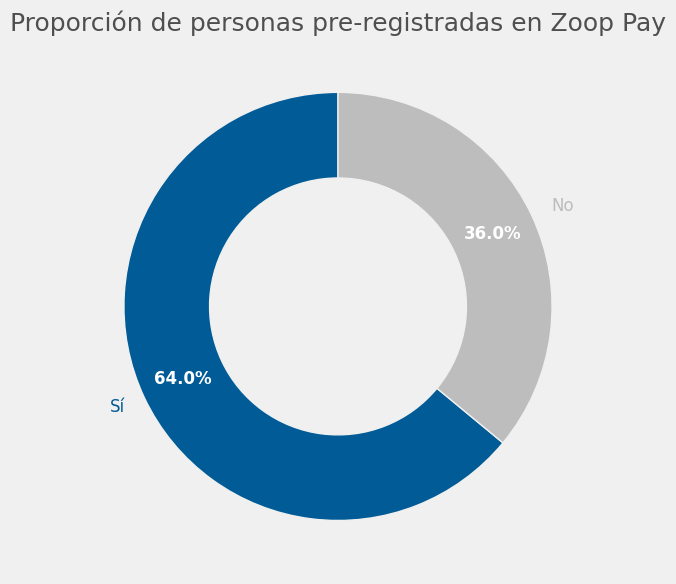

In [283]:
import matplotlib.pyplot as plt

# Colores institucionales
GRIS_1 = "#F0F0F0"
GRIS_3 = "#BDBDBD"
GRIS_5 = "#4F4F4F"
AZUL_1 = "#005B96"
BLANCO = "#FFFFFF"

# Datos de ejemplo (ajust√° si ya ten√©s los datos reales)
# Pre-registro: valores absolutos o proporciones
labels = ['S√≠', 'No']
valores = [320, 180]  # ejemplo: 320 pre-registrados, 180 no

# Colores por segmento
colores = [AZUL_1, GRIS_3]

# Crear figura
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# Gr√°fico de dona
wedges, texts, autotexts = ax.pie(
    valores,
    labels=labels,
    colors=colores,
    startangle=90,
    wedgeprops={'width': 0.4, 'edgecolor': GRIS_1},
    autopct='%1.1f%%',
    pctdistance=0.8,
    textprops={'fontsize': 12}
)

# Ajustar t√≠tulo
ax.set_title("Proporci√≥n de personas pre-registradas en Zoop Pay", fontsize=18, color=GRIS_5)

# Ajustes visuales para texto
for text, color in zip(texts, colores):
    text.set_color(color)
    text.set_fontsize(12)

for autotext in autotexts:
    autotext.set_color(BLANCO)
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

# Asegurar layout ajustado
plt.tight_layout()
plt.show()


# **Clase 5 - Finalizando el proyecto**

Antes de ajustar los √∫ltimos 5 visuales de nuestro proyecto, haremos una peque√±a modificaci√≥n en los 2 primeros pas√°ndolos a funci√≥n, lo que facilitar√° m√°s adelante cuando realicemos la exportaci√≥n de los visuales.


### **Gr√°fico 1 - M√©todos de pago m√°s utilizados en 2023:**

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def metodo_pago():
  # Colores institucionales
  GRIS_1 = "#F0F0F0"
  GRIS_5 = "#4F4F4F"
  ROJO_1 = "#E60023"
  AZUL_1 = "#005B96"
  AZUL_3 = "#3399CC"  # Definimos un azul m√°s claro como AZUL_3

  # Contar los m√©todos de pago
  conteo_pago = ventas['metodo_pago'].value_counts().reset_index()
  conteo_pago.columns = ['metodo_pago', 'cantidad']

  # Calcular porcentaje de los dos primeros m√©todos de pago
  suma_dos_primeros = conteo_pago['cantidad'][:2].sum()
  suma_total = conteo_pago['cantidad'].sum()
  porcentaje = (suma_dos_primeros / suma_total) * 100

  # Estilo Seaborn y fondo personalizado
  sns.set(style="whitegrid")

  # Crear figura
  fig, ax = plt.subplots(figsize=(10, 6))
  fig.patch.set_facecolor(GRIS_1)  # Fondo de la figura
  ax.set_facecolor(GRIS_1)         # Fondo del √°rea del gr√°fico

  # Barras
  bars = ax.bar(
      conteo_pago['metodo_pago'],
      conteo_pago['cantidad'],
      color=ROJO_1
  )

  # T√≠tulo personalizado
  plt.title("M√©todos de pago m√°s utilizados en 2023", fontsize=18, color=GRIS_5)

  # Suprimir eje Y
  ax.set_ylabel('')
  ax.set_yticks([])

  # Estilo del eje X
  ax.set_xlabel('')
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)

  # Eliminar bordes superior, derecho e izquierdo
  for spine in ['top', 'right', 'left']:
      ax.spines[spine].set_visible(False)

  # A√±adir etiquetas de cantidad encima de cada barra
  for bar in bars:
      height = bar.get_height()
      ax.text(
          bar.get_x() + bar.get_width() / 2,
          height + max(conteo_pago['cantidad']) * 0.01,
          f"{height:.0f}",
          ha='center',
          va='bottom',
          fontsize=12,
          color=AZUL_1
      )

  # A√±adir texto explicativo dentro del gr√°fico
  texto = (
      f"{porcentaje:.2f}% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \n"
      "para el pago. Ser√≠a interesante considerar asociaciones con \n"
      "bancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \n"
      "a nuestra clientela."
  )
  ax.text(
      1.5, 2500,  # Ajusta la coordenada y si tus valores son muy diferentes
      texto,
      fontsize=10,
      color=AZUL_3
  )

  plt.tight_layout()
  return plt

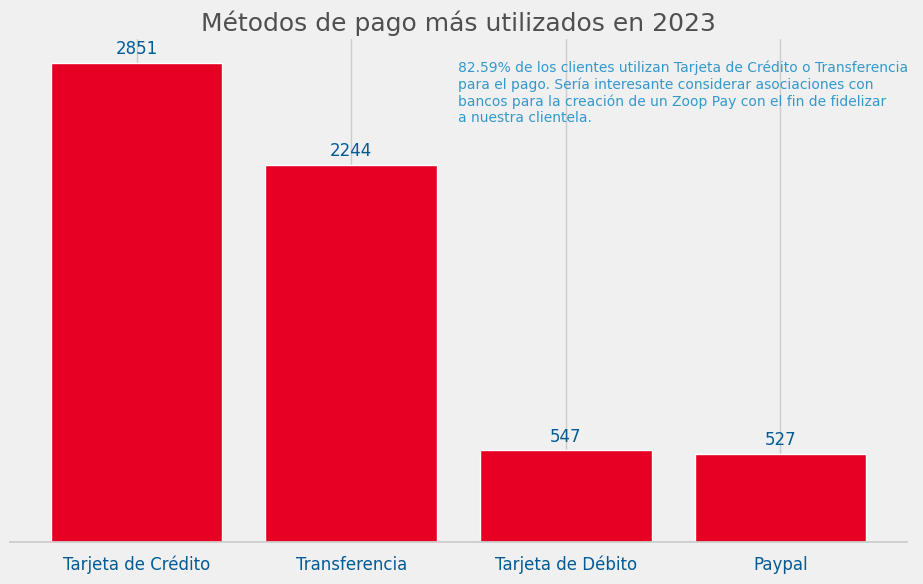

In [285]:
metodo_pago().show()

### **Gr√°fico 2 - Total de ventas mensuales en 2023:**

In [286]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Circle
from matplotlib.transforms import blended_transform_factory

def ventas_mensuales():
  # Colores institucionales
  GRIS_1 = "#F0F0F0"
  GRIS_5 = "#4F4F4F"
  AZUL_1 = "#005B96"

  # Diccionario de meses ordenados (en espa√±ol o ingl√©s seg√∫n idioma de sistema)
  """meses = {
      'January': 1, 'February': 2, 'March': 3, 'April': 4,
      'May': 5, 'June': 6, 'July': 7, 'August': 8,
      'September': 9, 'October': 10, 'November': 11, 'December': 12
  }
  """
  meses = {
      'January': 'Ene',
      'February': 'Feb',
      'March': 'Mar',
      'April': 'Abr',
      'May': 'May',
      'June': 'Jun',
      'July': 'Jul',
      'August': 'Ago',
      'September': 'Sep',
      'October': 'Oct',
      'November': 'Nov',
      'December': 'Dic'
  }


  # Crear columna de mes como string
  df['mes'] = df['fecha'].dt.strftime('%B')  # o '%B' si tu sistema est√° en ingl√©s

  # Agrupar y ordenar
  ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())

  # Crear figura
  fig, ax = plt.subplots(figsize=(12, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Dibujar la l√≠nea
  ax.plot(
      ventas_mensuales.index,
      ventas_mensuales.values,
      marker='o',
      color=AZUL_1,
      linewidth=2
  )

  # T√≠tulo del gr√°fico
  plt.title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

  # Suprimir etiquetas de los ejes
  ax.set_xlabel('')
  ax.set_ylabel('')

  # Formato de los ticks del eje Y
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)

  # Formatear los valores del eje Y como moneda
  def formato_mxn(x, pos):
      return f"MXN${x / 1_000_000:.2f} M"

  ax.yaxis.set_major_formatter(ticker.FuncFormatter(formato_mxn))
  #Configuraciones adicionales
  plt.xticks(ventas_mensuales.index, [meses[mes] for mes in ventas_mensuales.index], fontsize=12, color=AZUL_1)

  # Eliminar bordes superior y derecho
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  # ---- A√±adir c√≠rculos y n√∫meros ----
  # √çndices 4, 7, 10, 11 para 5¬∫, 8¬∫, 11¬∫, 12¬∫ (base 0)
  puntos_destacados = [4, 7, 10, 11]

  # A√±adir c√≠rculos visibles y numeraci√≥n usando ax.plot (m√°s fiable con categor√≠as)
  for i, idx in enumerate(puntos_destacados, start=1):
      x_val = ventas_mensuales.index[idx]
      y_val = ventas_mensuales.values[idx]

  # Crear c√≠rculo con radio en puntos de pantalla, no en datos
      circle = Circle(
          (x_val, y_val),
          radius=0.4,  # controla el radio relativo; ajust√° si hace falta
          transform=ax.transData,
          facecolor='none',
          edgecolor=ROJO_1,
          linewidth=2,
          zorder=5
      )
      ax.add_patch(circle)
  # Agregar n√∫mero con desplazamiento
      ax.annotate(
          str(i),
          xy=(x_val, y_val),
          xytext=(-10, 0),
          textcoords='offset points',
          ha='right',
          va='center',
          fontsize=14,
          color=ROJO_1
      )


  plt.tight_layout()
  return plt

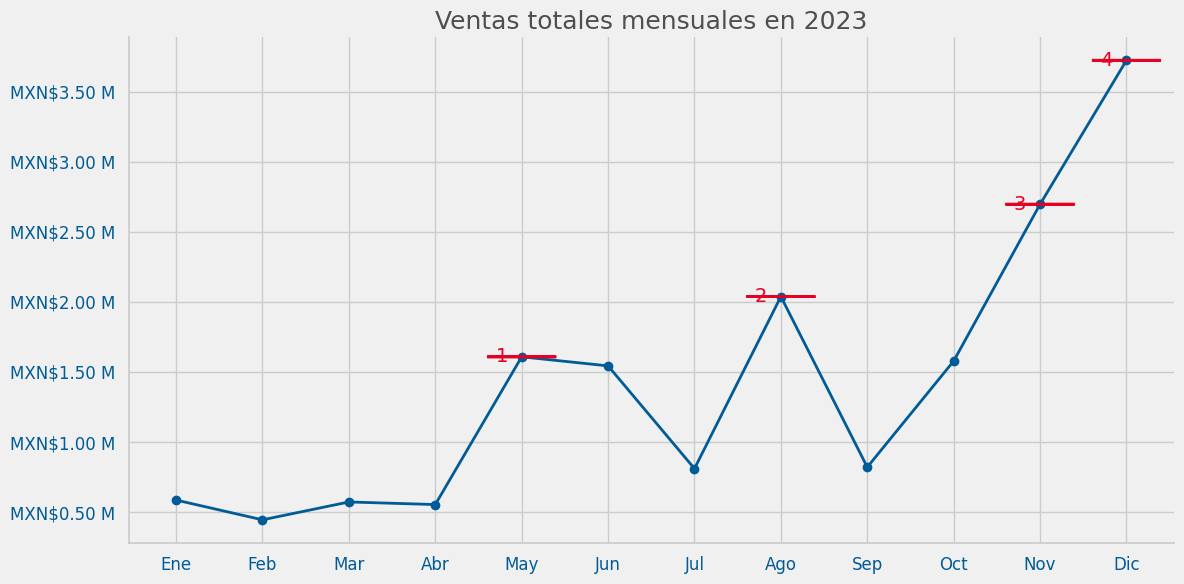

In [287]:
ventas_mensuales().show()

Ahora que guardamos los 2 primeros gr√°ficos en funci√≥n, vamos a modificar uno m√°s, **Facturaci√≥n por categor√≠a de producto en 2023**, utilizando las t√©cnicas de storytelling que ya hemos aprendido.


### **Gr√°fico 3 - Facturaci√≥n por categor√≠a de producto en 2023:**


Vamos a continuar con los gr√°ficos generados a lo largo de las clases, partiendo ahora del gr√°fico de facturaci√≥n por categor√≠a de producto aplicando las t√©cnicas de storytelling que aprendimos aqu√≠ en el curso mediante el uso de la IA.


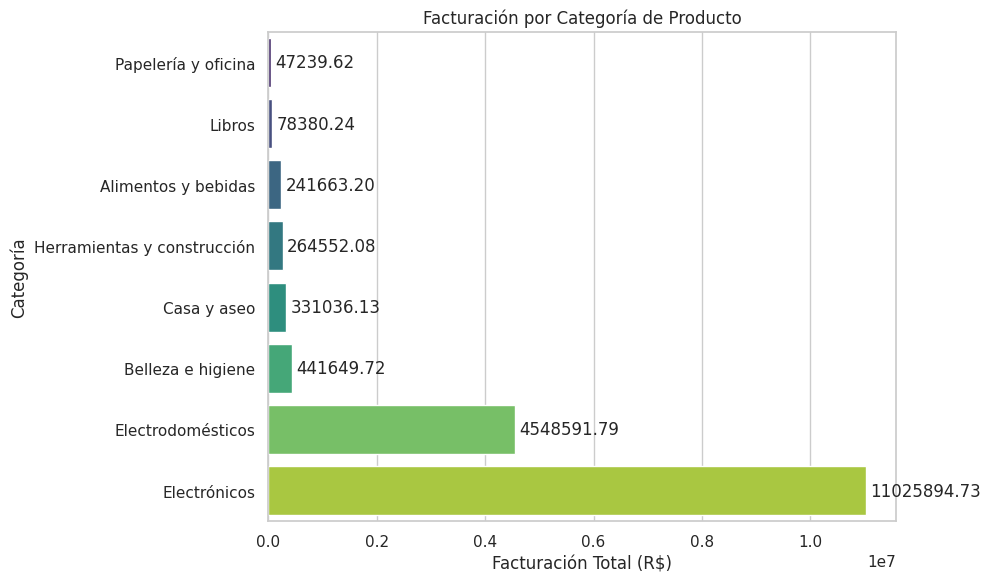

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Cargar los datasets desde las URLs
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
zoop_pay = pd.read_csv(url_zoop_pay)

# 2. Fusionar ventas y clientes por 'ID_compra'
df = pd.merge(ventas, clientes, on='ID_compra', how='inner')

# 3. Fusionar el resultado con zoop_pay por 'ID_compra'
df = pd.merge(df, zoop_pay, on='ID_cliente', how='inner')

# 4. Renombrar columnas para asegurar consistencia
df = df.rename(columns={
    'horario': 'hora',
    'categoria': 'categor√≠a',
    'participa_cashback': 'cashback',
    'nota_compra': 'nota',
    'cidade': 'ciudad',
    'regiao': 'region'
})

# 5. Reorganizar las columnas en el orden deseado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "hora",
    "categor√≠a",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "nota"
]

# 1. Calcular la facturaci√≥n por fila
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# 2. Agrupar la facturaci√≥n por categor√≠a
facturacion_categoria = df.groupby('categor√≠a')['facturacion'].sum().reset_index().sort_values(by='facturacion', ascending=True)

# 3. Visualizar con gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=facturacion_categoria, x='facturacion', y='categor√≠a', palette='viridis')

# 4. Agregar los valores al lado de las barras
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge', padding=3)

plt.title('Facturaci√≥n por Categor√≠a de Producto')
plt.xlabel('Facturaci√≥n Total (R$)')
plt.ylabel('Categor√≠a')
plt.tight_layout()
plt.show()


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

¬øVamos a proceder con otro gr√°fico? Ahora, vamos refinar el gr√°fico de facturaci√≥n por categor√≠a. Recuerda que este gr√°fico fue de barras horizontales.

El script original del gr√°fico es el siguiente:

```python

# 1. Calcular la facturaci√≥n para cada compra
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# 2. Agrupar por categor√≠a y sumar la facturaci√≥n
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().reset_index()

# 3. Ordenar los datos por facturaci√≥n de mayor a menor
facturacion_categoria = facturacion_categoria.sort_values(by='facturacion', ascending=False)

# 4. Crear el gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='facturacion', y='categoria', data=facturacion_categoria, palette='viridis',orient='h')

# 5. A√±adir etiquetas y t√≠tulo
plt.title('Facturaci√≥n por Categor√≠a de Producto', fontsize=16)
plt.xlabel('Facturaci√≥n (en MXN$)', fontsize=12)
plt.ylabel('Categor√≠a', fontsize=12)

# 6. Mostrar el gr√°fico
plt.show()
```
Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las barras en el color AQUA_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Facturaci√≥n por categor√≠a de producto en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben ser suprimidas al igual que los labels de los ejes x y y (xlabel y ylabel), y las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1. Todas las bordes del gr√°fico deben ser suprimidas.

Adem√°s, es necesario mostrar el total de la facturaci√≥n de cada categor√≠a al lado derecho de cada barra, con el texto tambi√©n en color AZUL_1 y tama√±o 12.

Tambi√©n vamos a agregar un texto dentro del √°rea del gr√°fico. Para ello, divide el valor de la 1¬™ barra entre la suma de todas las barras y convi√©rtelo en un porcentaje, almacen√°ndolo en la variable "porcentaje".

Ahora, en la posici√≥n x = 0.4e7 y y = 5, agrega el siguiente texto con tama√±o 12 y color AZUL_3: `f"$\\bf{porcentaje:.2f}$% de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.\nEsto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as\npresentes en el portafolio de Zoop."`.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [289]:
import pandas as pd
import matplotlib.pyplot as plt

def facturacion_por_categoria():

  # 1. Cargar los datasets desde las URLs
  url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
  url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
  url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

  # Colores institucionales
  GRIS_1 = "#F0F0F0"
  GRIS_5 = "#4F4F4F"
  AZUL_1 = "#005B96"
  AZUL_3 = "#3C84B7"
  AQUA_1 = "#addcd4"


  clientes = pd.read_csv(url_clientes)
  ventas = pd.read_csv(url_ventas)
  zoop_pay = pd.read_csv(url_zoop_pay)

  # 2. Fusionar ventas y clientes por 'ID_compra'
  df = pd.merge(ventas, clientes, on='ID_compra', how='inner')

  # 3. Fusionar el resultado con zoop_pay por 'ID_compra'
  df = pd.merge(df, zoop_pay, on='ID_cliente', how='inner')

  # 4. Renombrar columnas para asegurar consistencia
  df = df.rename(columns={
      'horario': 'hora',
      'categoria': 'categor√≠a',
      'participa_cashback': 'cashback',
      'nota_compra': 'nota',
      'cidade': 'ciudad',
      'regiao': 'region'
  })

  # 5. Reorganizar las columnas en el orden deseado
  columnas_ordenadas = [
      "ID_compra",
      "fecha",
      "hora",
      "categor√≠a",
      "precio_unitario",
      "cantidad",
      "envio",
      "metodo_pago",
      "ID_cliente",
      "edad",
      "sexo_biologico",
      "ciudad",
      "estado",
      "region",
      "cashback",
      "nota"
  ]
  # 1. Calcular facturaci√≥n por compra
  df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

  # 2. Agrupar por categor√≠a
  facturacion_categoria = df.groupby('categor√≠a')['facturacion'].sum().reset_index()
  #facturacion_categoria = df.groupby('categor√≠a')['facturacion'].sum().reset_index().sort_values(by='facturacion', ascending=True)

  # 3. Ordenar por facturaci√≥n descendente
  facturacion_categoria = facturacion_categoria.sort_values(by='facturacion', ascending=False)

  # 4. Crear gr√°fico
  fig, ax = plt.subplots(figsize=(10, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # 5. Barras horizontales
  bars = ax.barh(
      y=facturacion_categoria['categor√≠a'],
      width=facturacion_categoria['facturacion'],
      color=AQUA_1
  )

  # 6. T√≠tulo
  ax.set_title(
      "Facturaci√≥n por categor√≠a de producto en 2023",
      fontsize=18,
      color=GRIS_5
  )

  # 7. Ejes: suprimir etiquetas y ticks de X
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticks([])

  # Etiquetas del eje Y (categor√≠as)
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

  # 8. Eliminar bordes
  for spine in ['top', 'right', 'bottom', 'left']:
      ax.spines[spine].set_visible(False)

  # 9. A√±adir texto al final de cada barra
  for bar in bars:
      width = bar.get_width()
      y_pos = bar.get_y() + bar.get_height() / 2
      ax.text(
          width + 0.02 * facturacion_categoria['facturacion'].max(),
          y_pos,
          f"${width / 1_000_000:.2f} M",
          va='center',
          ha='left',
          fontsize=12,
          color=AZUL_1
      )

  # 10. Calcular porcentaje de Electr√≥nica
  total = facturacion_categoria['facturacion'].sum()
  primera_categoria = facturacion_categoria.iloc[0]
  porcentaje = (primera_categoria['facturacion'] / total) * 100

  # 11. A√±adir texto explicativo
  ax.text(
      0.4e7, 5,
      f"$\\bf{porcentaje:.2f}$% de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.\n"
      "Esto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as\n"
      "presentes en el portafolio de Zoop.",
      fontsize=12,
      color=AZUL_3
  )

  plt.tight_layout()
  return plt


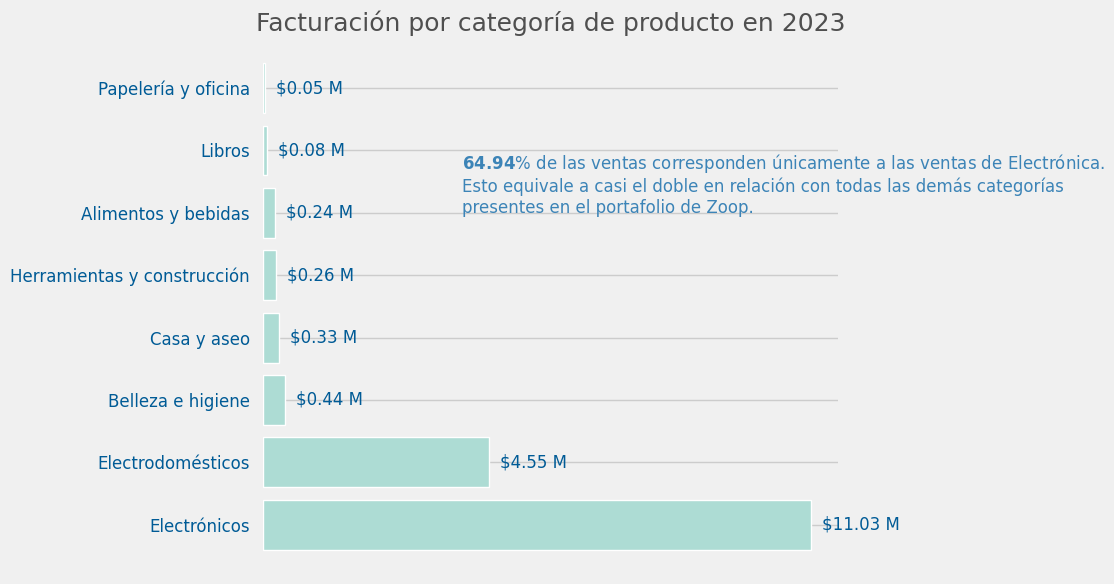

In [290]:
facturacion_por_categoria().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Hicimos con un solo prompt la inserci√≥n de las etiquetas, la modificaci√≥n de los colores y a√±adimos un texto explicativo. Con la secuencia de explicaciones para ChatGPT, este reconoce algunos patrones en la construcci√≥n y genera parte del c√≥digo incluso sin m√°s detalles.


## **5.2 - Ajustando los visuales de composici√≥n**

---


Ya hemos llegado a pr√°cticamente la mitad de los gr√°ficos refinados. Ahora, en este tema, ajustaremos 2 m√°s aplicando las t√©cnicas de storytelling que aprendimos aqu√≠ en el curso mediante el uso de la IA.


### **Gr√°fico 4 - Ventas por trimestre y m√©todo de pago:**

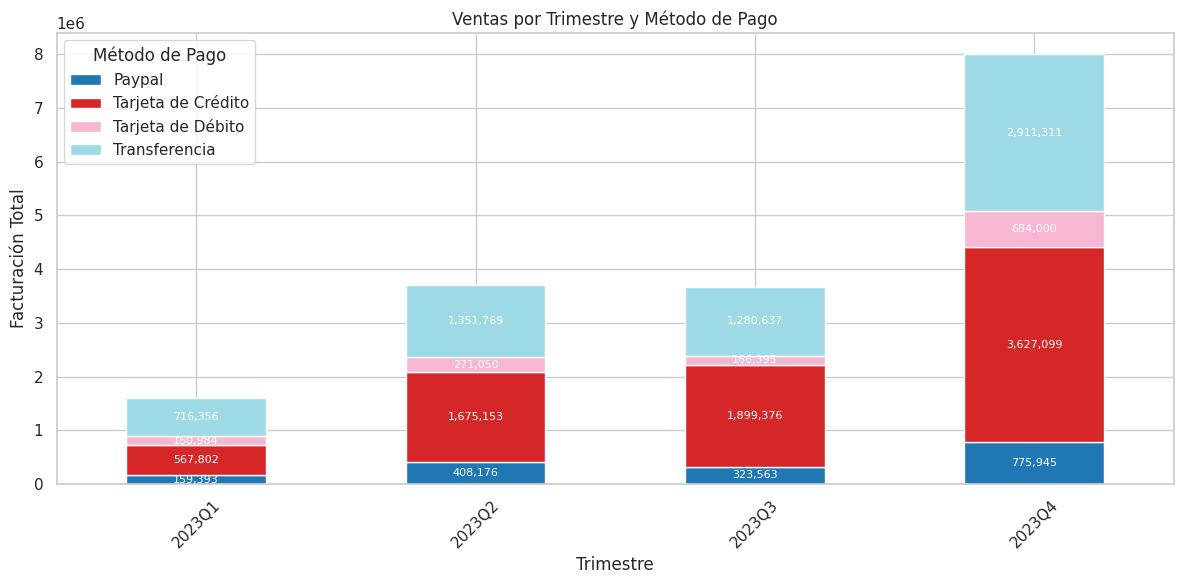

In [291]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df ya est√° cargado y tiene las columnas mencionadas
# Aseguramos que la columna 'fecha' sea tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Creamos una columna para el trimestre y el a√±o
df['trimestre'] = df['fecha'].dt.to_period('Q')

# Agrupamos por trimestre y m√©todo de pago, sumando la facturaci√≥n
ventas_trimestre = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack(fill_value=0)

# Creamos el gr√°fico de barras apiladas
ax = ventas_trimestre.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
# A√±adir etiquetas de valores
for idx, row in enumerate(ventas_trimestre.values):
    cum_height = 0
    for col_idx, value in enumerate(row):
        if value > 0:
            ax.text(
                idx,                      # posici√≥n x (barra)
                cum_height + value / 2,   # posici√≥n y (centro del segmento)
                f'{value:,.0f}',          # texto a mostrar
                ha='center', va='center',
                fontsize=8, color='white'
            )
            cum_height += value  # acumular altura para el siguiente segmento


plt.title('Ventas por Trimestre y M√©todo de Pago')
plt.xlabel('Trimestre')
plt.ylabel('Facturaci√≥n Total')
plt.legend(title='M√©todo de Pago')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Ahora vamos con el gr√°fico de Ventas por Trimestre y M√©todo de Pago que producimos anteriormente. Vamos a refinarlo usando las siguientes directrices.

Recuerda que el script original del gr√°fico es el siguiente:
```python

# 1. Crear una nueva columna 'trimestre' que extrae el trimestre de la columna 'fecha'
df['trimestre'] = df['fecha'].dt.to_period('Q')

# 2. Agrupar los datos por trimestre y m√©todo de pago, sumando la facturaci√≥n
ventas_trimestre = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack()

# 3. Crear el gr√°fico de barras apiladas
ventas_trimestre.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# 4. A√±adir etiquetas y t√≠tulo
plt.title('Ventas por Trimestre y M√©todo de Pago', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Facturaci√≥n Total', fontsize=12)
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor claridad

# 5. Mostrar el gr√°fico
plt.legend(title='M√©todo de Pago por trimestre de 2023')
plt.tight_layout()
plt.show()

```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1 y el tama√±o de la figura debe ser de (10, 6). La secuencia de colores de las columnas apiladas (palette) es [BLANCO, GRIS_3, GRIS_1, GRIS_3].

El t√≠tulo de la figura es "Ventas por Trimestre y M√©todo de Pago en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar a 0 grados y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben estar en el formato f"MXN$ valor M" sin decimales y las etiquetas de los ejes x e y (xlabel e ylabel) deben ser suprimidas. Todos los bordes del gr√°fico deben ser suprimidos(['top','bottom','left','right]).

Tambi√©n agrega una cuadr√≠cula punteada en y.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [292]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def ventas_por_trimestre_y_metodo_pago():
  # Colores de identidad visual de Zoop (puedes ajustar estos valores hex si tienes los c√≥digos exactos)
  GRIS_1 = '#FF6666'  # Fondo principal
  GRIS_3 = '#A0F0E0'  # Gris medio
  GRIS_5 = '#F0F050'  # Gris oscuro para t√≠tulo
  AZUL_1 = '#2233A0'  # Azul corporativo
  BLANCO = '#66b3ff'  # Blanco

  # Crear nueva columna 'trimestre'
  df['trimestre'] = df['fecha'].dt.to_period('Q')

  # Agrupar por trimestre y m√©todo de pago
  ventas_trimestre = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack()

  # Crear figura y ejes
  fig, ax = plt.subplots(figsize=(10, 6))
  ventas_trimestre.plot(
      kind='bar',
      stacked=True,
      ax=ax,
      color=[BLANCO, GRIS_3, GRIS_1, GRIS_3],  # Paleta espec√≠fica
  )

  # Fondo del gr√°fico y figura
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # T√≠tulo con estilo
  ax.set_title('Ventas por Trimestre y M√©todo de Pago en 2023',
              fontsize=18, color=GRIS_5)

  # Eliminar etiquetas de ejes
  ax.set_xlabel('')
  ax.set_ylabel('')

  # Personalizar xticks
  ax.set_xticks(ax.get_xticks())
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0,
                    fontsize=12, color=AZUL_1)

  # Personalizar yticks con formato "MXN$ valor M"
  def format_mxn_m(x, pos):
      return f'MXN$ {x/1e6:.0f} M'
  ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_mxn_m))
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

  # Eliminar bordes
  for spine in ['top', 'bottom', 'left', 'right']:
      ax.spines[spine].set_visible(False)

  # Agregar cuadr√≠cula punteada en y
  ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color=GRIS_3)
  ax.xaxis.grid(False)

  # Leyenda
  ax.legend(title='M√©todo de Pago por trimestre de 2023', frameon=False)

  # Ajuste de layout
  plt.tight_layout()
  return plt


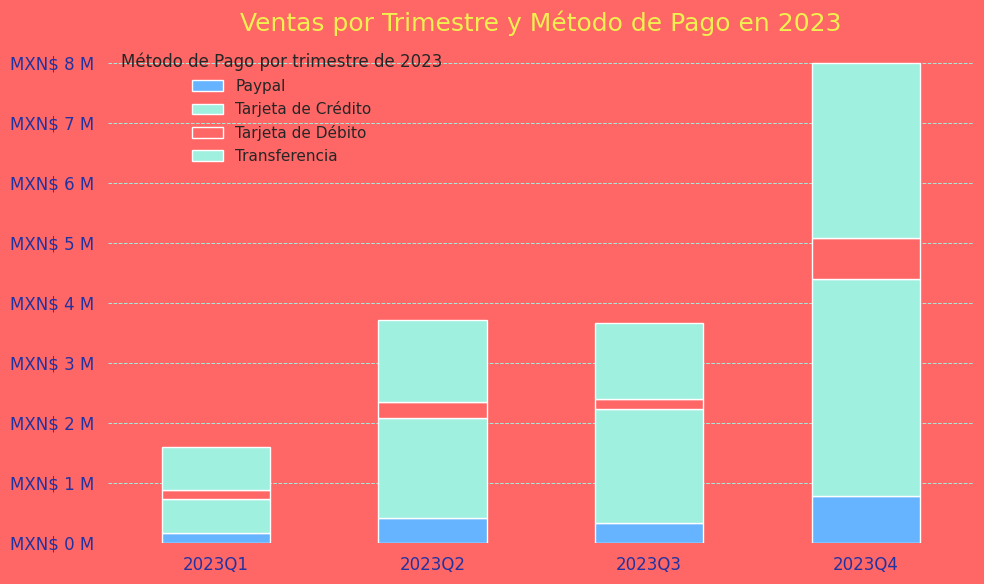

In [293]:
ventas_por_trimestre_y_metodo_pago().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Ajustamos el gr√°fico de barras apiladas representando con colores m√°s suaves los valores de los m√©todos de pago. Podemos notar cosas interesantes en este gr√°fico, como: el 2¬∫ y 4¬∫ trimestre siendo los momentos en que Zoop factura m√°s con ventas, y tambi√©n el aumento en los pagos de las compras realizadas por los clientes mediante tarjeta de cr√©dito.


### **Gr√°fico 5 - Clientes participantes del programa de cashback:**

Ahora ha llegado el momento del gr√°fico de sectores. Ya est√° bien encaminado, pero necesitamos realizar algunos ajustes.


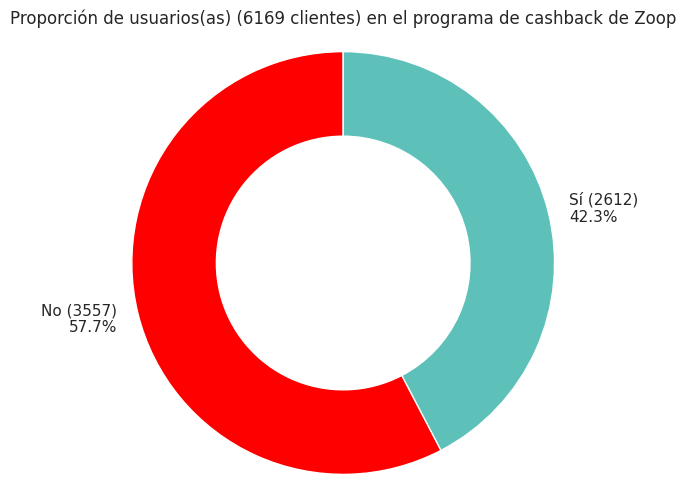

In [294]:
# Contar participaci√≥n
conteo = df['cashback'].value_counts()
total = conteo.sum()

# Crear etiquetas personalizadas: "S√≠ (5)\n55.6%"
labels = [f'{label} ({count})\n{count/total:.1%}' for label, count in conteo.items()]

# Colores personalizados
colors = ['#FF0000', '#5DC1B9']  # Verde para S√≠, Amarillo para No

# Crear gr√°fico de rosquilla (donut)
plt.figure(figsize=(6, 6))
wedges, texts = plt.pie(conteo, labels=labels, startangle=90, colors=colors, wedgeprops={'width': 0.4})

# Agregar t√≠tulo con total
plt.title(f'Proporci√≥n de usuarios(as) ({total} clientes) en el programa de cashback de Zoop')

# Hacerlo perfectamente circular
plt.axis('equal')

# Mostrar el gr√°fico
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora, vamos a refinar el gr√°fico de dona que produjimos para la proporci√≥n de usuarios que se adhieren al programa de cashback.

Recuerda que el script original del gr√°fico es el siguiente:

```python
plt.figure(figsize=(6, 6))
plt.pie(cashback_proporcion, labels=cashback_proporcion.index, autopct='%1.1f%%',
        colors=['#FF6666', '#66b3ff'], startangle=90, explode=(0.05, 0), wedgeprops={'width': 0.4})

# 3. A√±adir t√≠tulo
plt.title('Proporci√≥n de Usuarios Participando en el Programa de Cashback', fontsize=16)

# 4. Mostrar el gr√°fico
plt.axis('equal')  # Asegura que el gr√°fico sea un c√≠rculo
plt.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de la porci√≥n de valor "No" igual a GRIS_3, el color de la porci√≥n de valor "S√≠" igual a AZUL_1 y el tama√±o de la figura debe ser de (6, 6).

El t√≠tulo de la figura es "¬øParticipan en el programa de cashback?" con un tama√±o de 18 y su color GRIS_5.

Las etiquetas de las porciones deben tener el mismo color que las porciones y un tama√±o de 12, y los porcentajes deben estar en color BLANCO, tambi√©n con un tama√±o de 12.

La propiedad de ancho de la dona (`wedgeprops`) debe ser de 0.4, la posici√≥n de los porcentajes dentro de la porci√≥n (`pctdistance`) debe ser de 0.8, el √°ngulo de inicio debe ser de 180 (`startangle`), y sin explosi√≥n de porciones.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [295]:
import matplotlib.pyplot as plt

def proporcion_cashback():
  # Colores de identidad visual de Zoop
  GRIS_1 = '#E0E0E0'  # Fondo principal
  GRIS_3 = '#A0A0A0'  # Color para "No"
  AZUL_1 = '#0033A0'  # Color para "S√≠"
  GRIS_5 = '#505050'  # T√≠tulo
  BLANCO = '#FFFFFF'  # Texto blanco
  cashback_proporcion = df['cashback'].value_counts()

  # Datos de proporci√≥n (aseg√∫rate que cashback_proporcion tenga √≠ndices 'S√≠' y 'No')
  colors = [AZUL_1 if label == 'S√≠' else GRIS_3 for label in cashback_proporcion.index]

  # Crear figura y fondo
  fig, ax = plt.subplots(figsize=(6, 6), facecolor=GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Gr√°fico de dona
  wedges, texts, autotexts = ax.pie(
      cashback_proporcion,
      labels=cashback_proporcion.index,
      autopct='%1.1f%%',
      colors=colors,
      startangle=180,
      wedgeprops={'width': 0.4},
      pctdistance=0.8
  )

  # Personalizar etiquetas de texto y porcentajes
  for text, label in zip(texts, cashback_proporcion.index):
      text.set_color(AZUL_1 if label == 'S√≠' else GRIS_3)
      text.set_fontsize(12)

  for autotext in autotexts:
      autotext.set_color(BLANCO)
      autotext.set_fontsize(12)

  # T√≠tulo personalizado
  ax.set_title("¬øParticipan en el programa de cashback?",
              fontsize=18, color=GRIS_5)

  # Asegura la forma circular
  ax.axis('equal')

  # Mostrar gr√°fico
  plt.tight_layout()
  return plt


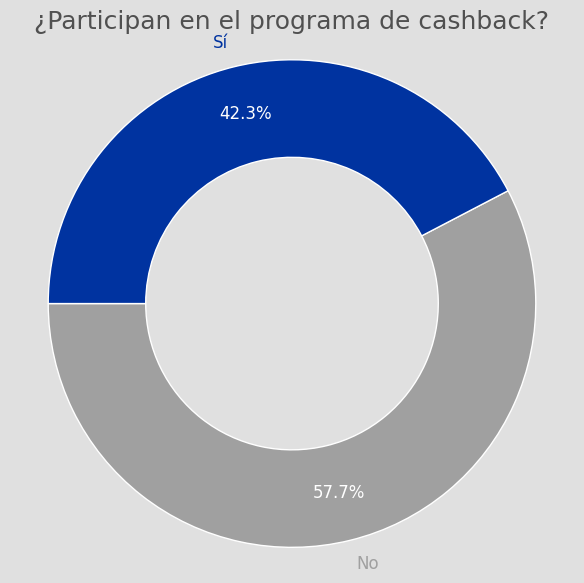

In [296]:
proporcion_cashback().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos modificado otro gr√°fico, ahora el de dona, para representar la proporci√≥n de nuestros(as) clientes. Dimos mayor destaque al "S√≠", utilizando el color como recurso de punto focal.


## **5.3 - Ajustando los visuales de distribuci√≥n**

---


Ahora vamos con los √∫ltimos 2 gr√°ficos antes de la exportaci√≥n de los visuales. Vamos a aplicar m√°s t√©cnicas de storytelling que aprendimos mediante el uso de la IA.


### **Gr√°fico 6 - Evaluaciones de los productos:**


Agora vamos para a distribui√ß√£o das avalia√ß√µes dos produtos em que criamos um histograma. Vamos adicionar mais um novo elemento visual e realizar alguns ajustes.

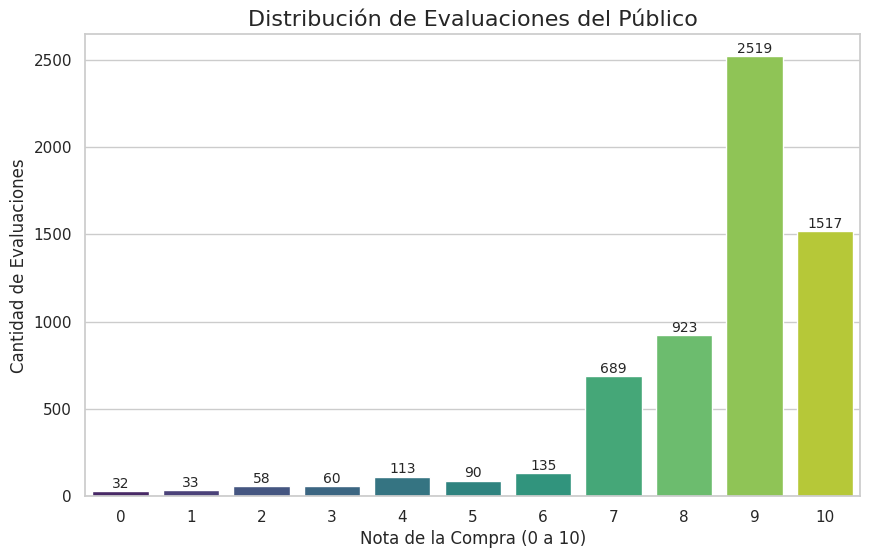

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn para una mejor visualizaci√≥n
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(10, 6))
#sns.countplot(data=df, x='nota', palette='viridis')
ax = sns.countplot(data=df, x='nota', palette='viridis')
# A√±adir valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Evita mostrar etiquetas en barras vac√≠as
        ax.text(
            p.get_x() + p.get_width() / 2,  # Posici√≥n X centrada
            height + 1,                     # Un poco por encima de la barra
            f'{int(height)}',              # Mostrar valor como entero
            ha='center', va='bottom', fontsize=10
        )
# A√±adir etiquetas y t√≠tulo
plt.title('Distribuci√≥n de Evaluaciones del P√∫blico', fontsize=16)
plt.xlabel('Nota de la Compra (0 a 10)', fontsize=12)
plt.ylabel('Cantidad de Evaluaciones', fontsize=12)
plt.xticks(range(0, 11))  # Asegura que est√©n todos los valores de 0 a 10

# Mostrar el gr√°fico
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos con el gr√°fico de la Distribuci√≥n de las Evaluaciones de Compra que produjimos anteriormente. Vamos a refinarlo usando las siguientes orientaciones.

El script original que genera el gr√°fico es el siguiente:

```python
# 1. Configurar el tama√±o del gr√°fico
plt.figure(figsize=(10, 6))

# 2. Crear el gr√°fico de distribuci√≥n (histograma)
sns.histplot(df['nota'], bins=11, kde=False, color='skyblue')

# 3. A√±adir etiquetas y t√≠tulo
plt.title('Distribuci√≥n de las Calificaciones de las Compras', fontsize=16)
plt.xlabel('Calificaci√≥n (0-10)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# 4. Mostrar el gr√°fico
plt.show()
```

Nuestro gr√°fico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de las columnas en ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Distribuci√≥n de las evaluaciones de las compras en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar en el rango de 0 a 10 con 11 bins y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1 y las etiquetas de los ejes x e y (xlabel e ylabel) tambi√©n deben tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos (['top', 'bottom', 'left', 'right']).

El grid del eje y debe estar detr√°s del gr√°fico (`ax.set_axisbelow(True)`).

Vamos a a√±adir una caja de anotaci√≥n (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico. El texto de la anotaci√≥n es

```python
f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n Calificaci√≥n m√°s com√∫n = {df['nota'].value_counts().idxmax()}\n Frecuencia m√°s com√∫n = {df['nota'].value_counts().max()}"
```

en color AZUL_1. A√±ade la caja de anotaci√≥n con el texto en la posici√≥n xytext=(2, 1800) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(8.7, 2250).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

def distribucion_calificaciones():
  # Colores corporativos de Zoop
  GRIS_1 = '#E0E0E0'  # Fondo
  GRIS_3 = '#A0A0A0'  # Borde de anotaci√≥n
  GRIS_5 = '#505050'  # T√≠tulo
  AZUL_1 = '#0033A0'  # Texto y elementos principales
  ROJO_1 = '#FF4C4C'  # Color de las barras
  BLANCO = '#FFFFFF'  # Fondo de anotaci√≥n

  # Crear figura y ejes
  fig, ax = plt.subplots(figsize=(10, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Histograma
  sns.histplot(df['nota'], bins=11, kde=False, color=ROJO_1, ax=ax)

  # T√≠tulo
  ax.set_title("Distribuci√≥n de las evaluaciones de las compras en 2023",
              fontsize=18, color=GRIS_5)

  # Etiquetas de ejes
  ax.set_xlabel("Calificaci√≥n (0-10)", fontsize=12, color=AZUL_1)
  ax.set_ylabel("Frecuencia", fontsize=12, color=AZUL_1)

  # Personalizar ticks
  ax.set_xticks(range(11))
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

  # Eliminar bordes
  for spine in ['top', 'bottom', 'left', 'right']:
      ax.spines[spine].set_visible(False)

  # Cuadr√≠cula detr√°s de las barras
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color=GRIS_3)
  ax.xaxis.grid(False)

  # Datos para anotaci√≥n
  promedio = df['nota'].mean().round(2)
  moda = df['nota'].value_counts().idxmax()
  frecuencia_moda = df['nota'].value_counts().max()
  texto_anotacion = (
      f"Promedio de calificaciones = {promedio}\n"
      f"Calificaci√≥n m√°s com√∫n = {moda}\n"
      f"Frecuencia m√°s com√∫n = {frecuencia_moda}"
  )

  # Anotaci√≥n
  ax.annotate(
      texto_anotacion,
      xy=(8.7, 2250), xycoords='data',
      xytext=(2, 1800), textcoords='data',
      fontsize=12, color=AZUL_1,
      arrowprops=dict(arrowstyle="->", color=AZUL_1),
      bbox=dict(boxstyle="round,pad=0.4", fc=BLANCO, ec=GRIS_3)
  )

  # Ajustar dise√±o
  plt.tight_layout()
  return plt


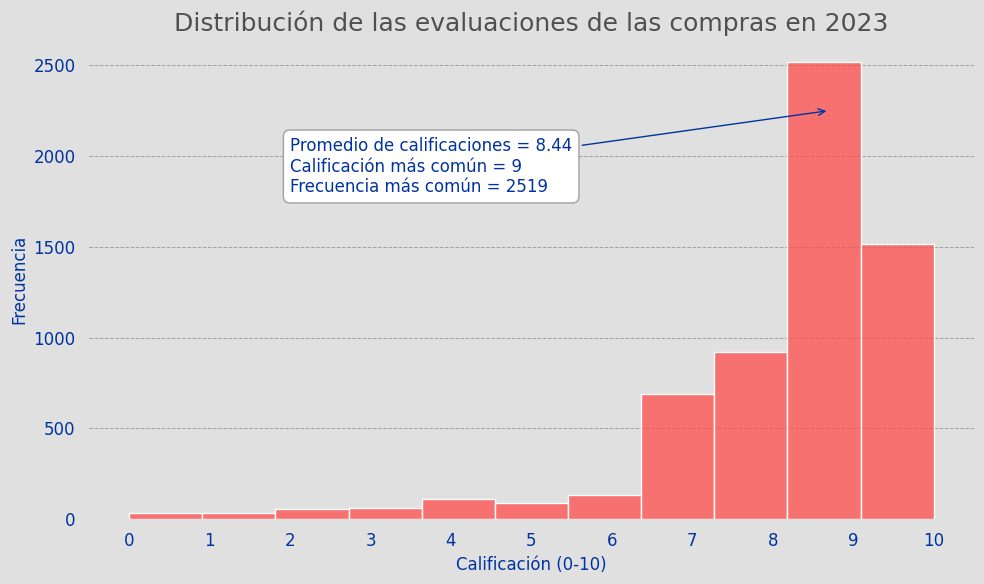

In [299]:
distribucion_calificaciones().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

¬°Una novedad m√°s en nuestro gr√°fico! A√±adimos la funci√≥n de caja de anotaciones, que es muy √∫til para proporcionar informaci√≥n sobre los datos. Con ella es posible utilizar flechas como indicadores para destacar detalles.


### **Gr√°fico 7 - Distribuci√≥n del p√∫blico por edad y sexo biol√≥gico:**


Ahora vamos con nuestra √∫ltima visualizaci√≥n.


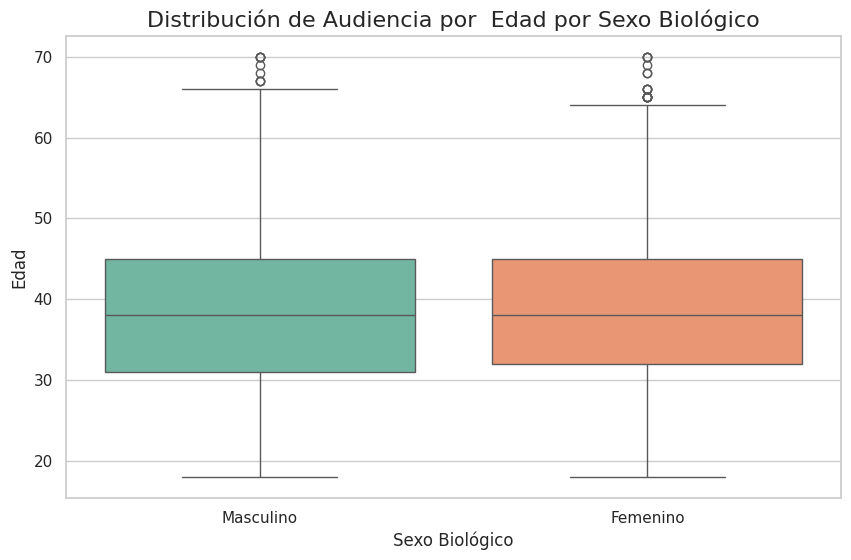

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x='sexo_biologico', y='edad', data=df , palette='Set2')

plt.title('Distribuci√≥n de Audiencia por  Edad por Sexo Biol√≥gico', fontsize=16)
plt.xlabel('Sexo Biol√≥gico', fontsize=12)
plt.ylabel('Edad', fontsize=12)

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos al gr√°fico de boxplot de la Distribuci√≥n de la Edad por Sexo Biol√≥gico que produjimos anteriormente. Vamos a refinado usando las siguientes orientaciones.

El script original que genera el gr√°fico es el siguiente:

```python
# 1. Configurar el tama√±o del gr√°fico
plt.figure(figsize=(10, 6))

# 2. Crear el gr√°fico de boxplot
sns.boxplot(x='sexo_biologico', y='edad', data=df, palette='Set2')

# 3. A√±adir etiquetas y t√≠tulo
plt.title('Distribuci√≥n de la Audiencia por Edad y Sexo Biol√≥gico', fontsize=16)
plt.xlabel('Sexo Biol√≥gico', fontsize=12)
plt.ylabel('Edad', fontsize=12)

# 4. Mostrar el gr√°fico
plt.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Distribuci√≥n de la Edad por Sexo Biol√≥gico de los  clientes" con tama√±o 18 y su color GRIS_5.

La columna 'sexo_biologico' est√° representada en el eje x y la 'edad' en el eje y. La paleta de colores para los valores de x es [AZUL_1, AQUA_1].

La etiqueta del eje x (xlabel) debe ser suprimida. Los r√≥tulos del eje x y y (xticks y yticks) deben tener tama√±o 12 con el color AZUL_1 y la etiqueta del eje y (ylabel) tambi√©n debe tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos y la cuadr√≠cula del eje y debe estar detr√°s del gr√°fico (`ax.set_axisbelow(True)`).

Vamos a agregar dos cajas de anotaci√≥n (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico.

El texto de la primera anotaci√≥n en color AZUL_1 es

```python
f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[1]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[1]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[1]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[1]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[1]"
```

Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(-0.4, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(-0.1, 45).

El texto de la segunda anotaci√≥n en color AZUL_1 es

```python
f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[0]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[0]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[0]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[0]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[0]"
```


Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(0.6, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(0.9, 45).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [301]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot_edad_sexo():
  # Colores Zoop
  GRIS_1 = '#E0E0E0'   # Fondo
  GRIS_3 = '#A0A0A0'   # Borde de anotaci√≥n
  GRIS_5 = '#505050'   # T√≠tulo
  AZUL_1 = '#0033A0'   # Color corporativo
  AQUA_1 = '#00B8B8'   # Segundo color para boxplot
  BLANCO = '#FFFFFF'   # Fondo de anotaci√≥n

  # Crear figura y ejes
  fig, ax = plt.subplots(figsize=(10, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Boxplot con paleta personalizada
  sns.boxplot(
      x='sexo_biologico',
      y='edad',
      data=df,
      palette=[AZUL_1, AQUA_1],
      ax=ax
  )

  # T√≠tulo
  ax.set_title("Distribuci√≥n de la Edad por Sexo Biol√≥gico de los clientes",
              fontsize=18, color=GRIS_5)

  # Suprimir etiqueta del eje x
  ax.set_xlabel('')

  # Etiqueta del eje y
  ax.set_ylabel("Edad", fontsize=12, color=AZUL_1)

  # Personalizar los ticks
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

  # Eliminar bordes del gr√°fico
  for spine in ['top', 'bottom', 'left', 'right']:
      ax.spines[spine].set_visible(False)

  # Cuadr√≠cula detr√°s del gr√°fico
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color=GRIS_3)
  ax.xaxis.grid(False)

  # Estad√≠sticas por sexo biol√≥gico
  stats = df.groupby("sexo_biologico")["edad"].agg(
      m√≠nimo='min',
      q1=lambda x: x.quantile(0.25),
      q2='median',
      q3=lambda x: x.quantile(0.75),
      m√°ximo='max'
  )

  # Anotaci√≥n para el segundo grupo (√≠ndice 1)
  texto_1 = (
      f"M√≠nimo = {int(stats.iloc[1]['m√≠nimo'])}\n"
      f"1¬∫ quartil = {int(stats.iloc[1]['q1'])}\n"
      f"2¬∫ quartil = {int(stats.iloc[1]['q2'])}\n"
      f"3¬∫ quartil = {int(stats.iloc[1]['q3'])}\n"
      f"M√°ximo = {int(stats.iloc[1]['m√°ximo'])}"
  )
  ax.annotate(
      texto_1,
      xy=(0.9, 45), xycoords='data',
      xytext=(0.6, 50), textcoords='data',
      fontsize=12, color=AZUL_1,
      arrowprops=dict(arrowstyle="->", color=AZUL_1),
      bbox=dict(boxstyle="round,pad=0.4", fc=BLANCO, ec=GRIS_3)
  )

  # Anotaci√≥n para el primer grupo (√≠ndice 0)
  texto_0 = (
      f"M√≠nimo = {int(stats.iloc[0]['m√≠nimo'])}\n"
      f"1¬∫ quartil = {int(stats.iloc[0]['q1'])}\n"
      f"2¬∫ quartil = {int(stats.iloc[0]['q2'])}\n"
      f"3¬∫ quartil = {int(stats.iloc[0]['q3'])}\n"
      f"M√°ximo = {int(stats.iloc[0]['m√°ximo'])}"
  )
  ax.annotate(
      texto_0,
      xy=(-0.1, 45), xycoords='data',
      xytext=(-0.4, 50), textcoords='data',
      fontsize=12, color=AZUL_1,
      arrowprops=dict(arrowstyle="->", color=AZUL_1),
      bbox=dict(boxstyle="round,pad=0.4", fc=BLANCO, ec=GRIS_3)
  )

  # Ajustar layout
  plt.tight_layout()
  return plt


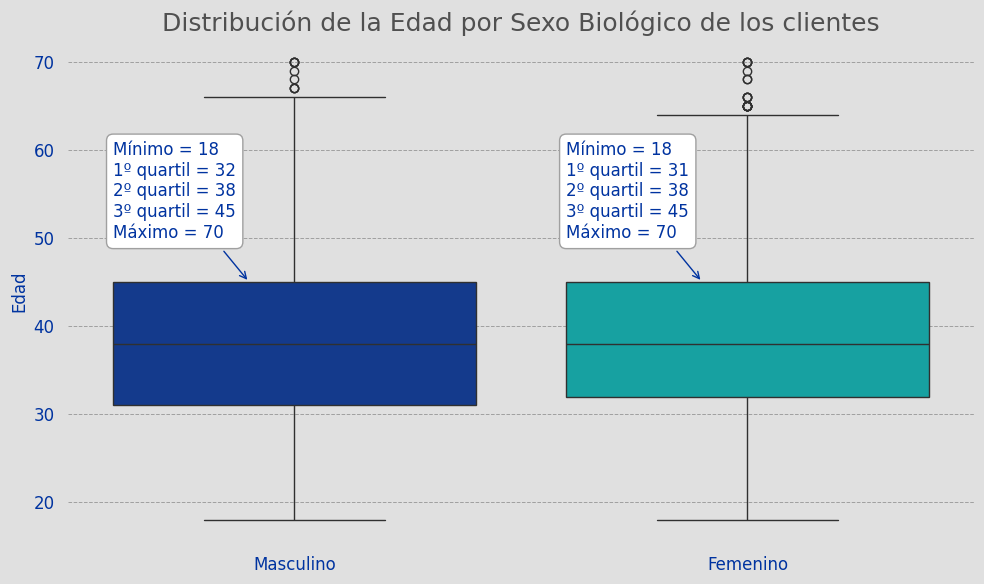

In [302]:
box_plot_edad_sexo().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Para nuestro √∫ltimo gr√°fico, creamos nuevamente el bloque de anotaciones se√±alando los valores que se muestran en un boxplot. Notamos que la distribuci√≥n entre los clientes de sexo biol√≥gico masculino y femenino es bastante cercana, con solo un a√±o de diferencia en el rango intercuartil (del 1¬∫ al 3¬∫ cuartil) en el caso del sexo biol√≥gico masculino. Zoop tiene en la mediana una clientela de 38 a√±os de edad para ambos sexos.


## **5.4 - Exportando las visualizaciones**

---



¬°Listo! Ahora que hemos finalizado los ajustes de todos los gr√°ficos solicitados, generaremos un √∫ltimo c√≥digo para exportar cada uno de los gr√°ficos que transformamos en funciones en formato de imagen (PNG).

<strong><font color="7b71ff" size =6>Prompt:</font></strong>
Ahora, vamos a nuestra √∫ltima etapa: guardar las visualizaciones como imagen. Coloca cada uno de los gr√°ficos que generamos dentro de una funci√≥n y quiero que se aplique el siguiente procedimiento a cada una de ellas:

```
nombre_imagen = nombre_funcion()
nombre_imagen.savefig('nombre_imagen.png', bbox_inches='tight')
nombre_imagen.close()
```
Las funciones son:


*   metodo_pago()
*   ventas_mensuales()
*   facturacion_por_categoria()
*   ventas_por_trimestre()
*   proporcion_cashback()
*   distribucion_calificaciones()
*   box_plot_edad_sexo()

Reemplaza la variable "nombre_imagen" por "grafico_" seguido del nombre de la funci√≥n que genera el gr√°fico.

Utiliza el lenguaje Python para crear el c√≥digo y no mostrar las im√°genes.

In [304]:
def exportar_graficos(grafico, nombre):
    imagen = grafico()
    imagen.savefig(f'{nombre}.png', bbox_inches='tight')
    imagen.close()


#Sustituye las llamdas de funci√≥n y nombres seg√∫n sea necesario
exportar_graficos(metodo_pago, 'metodo_pago')
exportar_graficos(ventas_mensuales, 'ventas_mensuales')
exportar_graficos(facturacion_por_categoria, 'facturacion_por_categoria')
exportar_graficos(ventas_por_trimestre_y_metodo_pago, 'ventas_por_trimestre_y_metodo_pago')
exportar_graficos(proporcion_cashback, 'proporcion_cashback')
exportar_graficos(distribucion_calificaciones, 'distribucion_calificaciones')
exportar_graficos(box_plot_edad_sexo, 'box_plot_edad_sexo')




¬°Ahora es tu turno! ¬øQu√© tal descargar los gr√°ficos y generar un informe con algunos insights y explicando los resultados?

¬°Espero que hayas disfrutado este curso y saques el m√°ximo provecho del contenido!